# Experiments

## Find zero atol in confidence interval estimation
Increasing find_zero_atol strictly decreases the number of LL evaluations because it strictly decreases the number of optimisation calls. This occurs after around 1e-14.
Increasing opt_abstol decreases the number of LL evaluations in general. However, if it gets too high then the optimiser will not find the true profile ll at each location and resultantly the number of optimisation calls may increase, either increasing the number of LL evaluations or making the magnitude of the decrease smaller.

In [39]:
using Logging
Logging.disable_logging(Logging.Warn) # Disable debug, info and warn

LogLevel(1001)

In [1]:
using DataFrames, CSV
using Plots, StatsPlots;
gr();
using LaTeXStrings
output_location = joinpath("Outputs", "logistic")
data_df = CSV.read(joinpath(output_location, "confidence_interval_ll_calls.csv"), DataFrame);
data_df_zero = filter(row -> row.find_zero_atol == 0.0, data_df)

format = (palette=:Paired, msw=0, size=(430, 430), dpi=300, title="")

plt1 = @df data_df_zero scatter(log10.(:opt_abstol), :likelihood_calls; group=:parameter, alpha=0.8, legend_position=:topright, format...);
# ylabel!("Total Likelihood Calls")
# savefig(plt, joinpath(output_location, "conf_int_likelihood_calls_vs_abstol.pdf"))

plt2 = @df data_df_zero scatter(log10.(:opt_abstol), :optimisation_calls; group=:parameter, alpha=0.8, legend_position=nothing, format...);
xlabel!(L"log_{10}(\texttt{abstol})");
# ylabel!("Total Optimisation Calls\n")

plt = plot(plt1, plt2, layout=grid(2, 1))
savefig(plt, joinpath(output_location, "conf_int_calls_vs_abstol.pdf"))


data_df_zero = filter(row -> row.opt_abstol == 0.0, data_df);

plt1 = @df data_df_zero scatter(log10.(:find_zero_atol), :likelihood_calls; group=:parameter, alpha=0.8, legend_position=nothing, format...);
# xlabel!(L"log_{10}(\texttt{atol})")
ylabel!("Total Likelihood Calls")
# savefig(plt, joinpath(output_location, "conf_int_likelihood_calls_vs_atol.pdf"))

plt2 = @df data_df_zero scatter(log10.(:find_zero_atol), :optimisation_calls; group=:parameter, alpha=0.8, legend_position=nothing, format...);
xlabel!(L"log_{10}(\texttt{atol})");
ylabel!("Total Optimisation Calls\n")
# savefig(plt, joinpath(output_location, "conf_int_optimisation_calls_vs_atol.pdf"))


plt = plot(plt1, plt2, layout=grid(2, 1))
savefig(plt, joinpath(output_location, "conf_int_calls_vs_atol.pdf"))
# ggplot(aes(x=opt_abstol, y=likelihood_calls)) + 
# geom_point(aes(colour=parameter)) +
# scale_x_continuous(trans="log10") +

"c:\\Users\\joelt\\Documents\\GitHub\\JuLikelihood_MastersWorking\\Experiments\\Outputs\\logistic\\conf_int_calls_vs_atol.pdf"

In [ ]:
using DataFrames, CSV
using Plots, StatsPlots;
gr();
using LaTeXStrings
output_location = joinpath("Outputs", "logistic")
data_df = CSV.read(joinpath(output_location, "confidence_interval_ll_calls_lower_and_upper.csv"), DataFrame);


format = (palette=:Paired, msw=0, size=(430, 430), dpi=300, title="");

using CategoricalArrays
par_names = ["λ", "K", "C0"]
data_df.par_str = categorical(par_names[data_df.parameter], levels=par_names)

data_df.name_cat .= categorical(data_df.name; levels=["Baseline", "Lower", "Higher", "Lower and Higher"])

plt1 = @df data_df groupedbar(:par_str, :likelihood_calls; bar_position=:dodge, group=:name_cat, legend_position=nothing, format...);
ylabel!("Total Likelihood Calls")

plt2 = @df data_df groupedbar(:par_str, :optimisation_calls; bar_position=:dodge, group=:name_cat, legend_position=:bottomright, format...);
ylabel!("Total Optimisation Calls")

savefig(plt1, joinpath(output_location, "conf_int_like_calls_vs_lu.pdf"))
savefig(plt2, joinpath(output_location, "conf_int_opt_calls_vs_lu.pdf"))

# Coverage Outputs

## Parameter Confidence Intervals

In [ ]:
using DataFrames, CSV
using Plots, StatsPlots;
gr();
using LaTeXStrings
using CategoricalArrays

format = (msw=1.5, size=(500, 400), dpi=300, title="", legend_position=nothing, ylabel="Simulated Coverage");
locs = ["logistic", "lotka_volterra", "logistic_twospecies"]

loc = locs[1]
output_location = joinpath("Outputs", loc)
data_df = CSV.read(joinpath(output_location, "univariate_parameter_coverage.csv"), DataFrame);
# data_df.θname = categorical(data_df.θname, levels=data_df.θname)

plt = @df data_df plot(:θname, :coverage; st=:bar, color=palette(:Paired)[1:nrow(data_df)], ylimits=(0.8, 1.0), yticks=LinRange(0.8, 1.0, 5),
    yerror=(data_df.coverage .- data_df.coverage_lb, data_df.coverage_ub .- data_df.coverage), format...);
annotate!(data_df.θname, fill(0.8, nrow(data_df)), text.(data_df.coverage, fill(:bottom, nrow(data_df)), fill(:black, nrow(data_df)), fill(8, nrow(data_df))))


savefig(plt, joinpath(output_location, "univariate_parameter_coverage_" * loc * ".pdf"))

loc = locs[2]
output_location = joinpath("Outputs", loc)
data_df = CSV.read(joinpath(output_location, "univariate_parameter_coverage.csv"), DataFrame);
# data_df.θname = categorical(data_df.θname, levels=data_df.θname)

plt = @df data_df plot(:θname, :coverage; st=:bar, color=palette(:Paired)[1:nrow(data_df)], bar_position=:stack, ylimits=(0.8, 1.0), yticks=LinRange(0.8, 1.0, 5),
    yerror=(data_df.coverage .- data_df.coverage_lb, data_df.coverage_ub .- data_df.coverage), format...);
annotate!(data_df.θname, fill(0.8, nrow(data_df)), text.(data_df.coverage, fill(:bottom, nrow(data_df)), fill(:black, nrow(data_df)), fill(8, nrow(data_df))))

savefig(plt, joinpath(output_location, "univariate_parameter_coverage_" * loc * ".pdf"))

loc = locs[3]
output_location = joinpath("Outputs", loc)
data_df = CSV.read(joinpath(output_location, "univariate_parameter_coverage.csv"), DataFrame);
# data_df.θname = categorical(data_df.θname, levels=data_df.θname)

plt = @df data_df plot(:θname, :coverage; st=:bar, color=palette(:Paired)[1:nrow(data_df)], bar_position=:stack, ylimits=(0.6, 1.0), yticks=LinRange(0.6, 1.0, 9),
    yerror=(data_df.coverage .- data_df.coverage_lb, data_df.coverage_ub .- data_df.coverage), format...);

annotate!(data_df.θname, fill(0.6, nrow(data_df)), text.(data_df.coverage, fill(:bottom, nrow(data_df)), fill(:black, nrow(data_df)), fill(8, nrow(data_df))))
savefig(plt, joinpath(output_location, "univariate_parameter_coverage_" * loc * ".pdf"))

output_location = joinpath("Outputs", loc)
data_df = CSV.read(joinpath(output_location, "univariate_parameter_coverage_more_data.csv"), DataFrame);
# data_df.θname = categorical(data_df.θname, levels=data_df.θname)

plt = @df data_df plot(:θname, :coverage; st=:bar, color=palette(:Paired)[1:nrow(data_df)], bar_position=:stack, ylimits=(0.6, 1.0), yticks=LinRange(0.6, 1.0, 9),
    yerror=(data_df.coverage .- data_df.coverage_lb, data_df.coverage_ub .- data_df.coverage), format...);

annotate!(data_df.θname, fill(0.6, nrow(data_df)), text.(data_df.coverage, fill(:bottom, nrow(data_df)), fill(:black, nrow(data_df)), fill(8, nrow(data_df))))

display(data_df)
savefig(plt, joinpath(output_location, "univariate_parameter_coverage_" * loc * "_more_data.pdf"))

## Bivariate Boundary Area Coverage
### Logistic example
Focusing on 95% lower quantile performance, i.e. in 95% of cases it will be at least 'this' good.

In [ ]:
using DataFrames, CSV
using Plots, StatsPlots;
gr();
using LaTeXStrings
using CategoricalArrays

format = (palette=:seaborn_colorblind, lw=2, size=(500, 400), dpi=300, title="", msw=0, mw=4, legend_position=:bottomright, xlabel="Total Boundary Points", minorgrid=true, minorticks=2, yticks=0.1:0.1:1.0, ylims=(0.2, 1.0));
locs = ["logistic", "lotka_volterra", "logistic_twospecies"];

loc = locs[1];
output_location = joinpath("Outputs", loc);
data_df = CSV.read(joinpath(output_location, "bivariate_boundary_coverage.csv"), DataFrame);

method_df = CSV.read(joinpath(output_location, "methods.csv"), DataFrame);
method_df[:, :method_name] .= [split(name, "(")[1] for name in method_df.method_name];
method_df[end, :method_name] = "IterativeBoundary_RadialRandom"
data_df[:, :hullmethod] .= [split(name, "(")[1] for name in data_df.hullmethod];

data_df = leftjoin(data_df, method_df, on=:method_key);

data_df.method_name = categorical(data_df.method_name, levels=["Fix1AxisMethod", "SimultaneousMethod", "RadialRandomMethod", "RadialMLEMethod", "IterativeBoundaryMethod", "IterativeBoundary_RadialRandom"])

plots = []
for sub_df in groupby(data_df, [:hullmethod, :θindices])
    plt = @df sub_df plot(:num_points, :coverage_median; group=:method_name, marker=(:circle), ylabel="Simulated Area Coverage (0.50 Quantile)", format...)
    hline!(plt, [0.98], linestyle=:dash, label="98%", color=:black)
    plt.subplots[1].series_list = [plt.subplots[1].series_list[end]; plt.subplots[1].series_list[1:end-1]]
    push!(plots, plt)
end

display(plots[1])
display(plots[2])
display(plots[3])
display(plots[4])
display(plots[5])
display(plots[6])

plots = []
for sub_df in groupby(data_df, [:hullmethod, :θindices])
    plt = @df sub_df plot(:num_points, :coverage_lb; group=:method_name, marker=(:circle), ylabel="Simulated Area Coverage", format...)
    hline!(plt, [0.98], linestyle=:dash, label="98%", color=:black)
    plt.subplots[1].series_list = [plt.subplots[1].series_list[end]; plt.subplots[1].series_list[1:end-1]]
    push!(plots, plt)
end

for i in eachindex(plots)
    plot!(plots[i], size=(400, 400))
    if (((i - 1) % 3) + 1) != 1
        plot!(plots[i], legend_position=nothing)
    end

    hullmethod = i < 4 ? "_MPP_" : "_ConvexHull_"

    savefig(plots[i], joinpath(output_location, "bivariate_area_coverage" * hullmethod * string(((i - 1) % 3) + 1) * ".pdf"))
end

display(plots[1])
display(plots[2])
display(plots[3])
display(plots[4])
display(plots[5])
display(plots[6])





format = (palette=:seaborn_colorblind, lw=2, size=(500, 400), dpi=100, title="", legend_position=:bottomright,
    # xlabel="Total Boundary Points", minorgrid=true, minorticks=2, 
    yticks=00:10:100
);


pnts_to_reach_coverage_df = DataFrame(method_name=String[], hullmethod=String[], θindices=String[], quantile=Float64[], coverage_level=String[], num_points=Int[])
coverage_levels = [0.97, 0.98, 0.99]

for sub_df in groupby(data_df, [:method_name, :hullmethod, :θindices])

    for level in coverage_levels
        i = findfirst(sub_df.coverage_median .>= level)
        dfrow = [sub_df.method_name[1], sub_df.hullmethod[1], sub_df.θindices[1], 0.5, string(level), -10]
        if isnothing(i)
            push!(pnts_to_reach_coverage_df, dfrow)
        else
            dfrow[end] = sub_df[i, :num_points]
            push!(pnts_to_reach_coverage_df, dfrow)
        end
    end

end

for sub_df in groupby(data_df, [:method_name, :hullmethod, :θindices])

    for level in coverage_levels
        i = findfirst(sub_df.coverage_lb .>= level)
        dfrow = [sub_df.method_name[1], sub_df.hullmethod[1], sub_df.θindices[1], 0.05, string(level), -10]
        if isnothing(i)
            push!(pnts_to_reach_coverage_df, dfrow)
        else
            dfrow[end] = sub_df[i, :num_points]
            push!(pnts_to_reach_coverage_df, dfrow)
        end
    end

end

pnts_to_reach_coverage_df.coverage_level = categorical(pnts_to_reach_coverage_df.coverage_level, levels=string.(coverage_levels))
pnts_to_reach_coverage_df.method_name = categorical(pnts_to_reach_coverage_df.method_name, levels=["Fix1AxisMethod", "SimultaneousMethod", "RadialRandomMethod", "RadialMLEMethod", "IterativeBoundaryMethod", "IterativeBoundary_RadialRandom"])


pnts_to_reach_wide = unstack(pnts_to_reach_coverage_df, [:θindices, :method_name, :hullmethod, :quantile], :coverage_level, :num_points)
sort!(pnts_to_reach_wide, [:quantile, :θindices, :method_name])

CSV.write(joinpath(output_location, "pnts_to_reach_coverage.csv"), pnts_to_reach_wide);


In [ ]:
using DataFrames, CSV
using Plots, StatsPlots;
gr();
using LaTeXStrings
using CategoricalArrays

format = (palette=:seaborn_colorblind, lw=2, size=(500, 400), dpi=300, title="", msw=0, mw=4, legend_position=:topleft, xlabel="Total Boundary Points", minorgrid=true, minorticks=2, #yticks=0.1:0.1:1.0
    opacity=0.8,
);
locs = ["logistic", "lotka_volterra", "logistic_twospecies"];

loc = locs[1];
output_location = joinpath("Outputs", loc);
data_df = CSV.read(joinpath(output_location, "confidence_boundary_ll_calls.csv"), DataFrame);

method_df = CSV.read(joinpath(output_location, "methods.csv"), DataFrame);
method_df[:, :method_name] .= [split(name, "(")[1] for name in method_df.method_name];
method_df[end, :method_name] = "IterativeBoundary_RadialRandom"

data_df = leftjoin(data_df, method_df, on=:method_key);

data_df.method_name = categorical(data_df.method_name, levels=["Fix1AxisMethod", "SimultaneousMethod", "RadialRandomMethod", "RadialMLEMethod", "IterativeBoundaryMethod", "IterativeBoundary_RadialRandom"]);


data_gdf = groupby(data_df, [:method_name, :num_points])
data_mean_opt = combine(data_gdf, :optimisation_calls => mean, :likelihood_calls => mean)

data_mean_opt.method_name = categorical(data_mean_opt.method_name, levels=["Fix1AxisMethod", "SimultaneousMethod", "RadialRandomMethod", "RadialMLEMethod", "IterativeBoundaryMethod", "IterativeBoundary_RadialRandom"]);

plt = @df data_mean_opt plot(:num_points, :optimisation_calls_mean; marker=(:circle), group=:method_name, ylims=(0, 3000), ylabel="Mean Optimisation Calls", format...)
savefig(plt, joinpath(output_location, "boundary_points_vs_opt_calls_mean.pdf"))

plt = @df data_mean_opt plot(:num_points, :likelihood_calls_mean; marker=(:circle), group=:method_name, ylabel="Mean Likelihood Calls", format...)
savefig(plt, joinpath(output_location, "boundary_points_vs_ll_calls_mean.pdf"))

plots = []
for sub_df in groupby(data_df, [:θindices])
    plt = plot()

    @df sub_df plot!(plt, :num_points, :optimisation_calls; marker=(:circle), group=:method_name, ylims=(0, 3000), ylabel="Mean Optimisation Calls", format...)
    push!(plots, plt)
end

for i in eachindex(plots)
    plot!(plots[i], size=(400, 400))
    if i != 1
        plot!(plots[i], legend_position=nothing)
    end

    savefig(plots[i], joinpath(output_location, "boundary_points_vs_opt_calls_" * string(i) * ".pdf"))
end

Impact of 50% wider bounds

In [ ]:
using DataFrames, CSV
using Plots, StatsPlots;
gr();
using LaTeXStrings
using CategoricalArrays

format = (palette=:seaborn_colorblind, lw=2, size=(500, 400), dpi=300, title="", msw=0, mw=4, legend_position=nothing, xlabel="Total Boundary Points", minorgrid=true, minorticks=2, #yticks=0.1:0.1:1.0
    opacity=0.8,
);
locs = ["logistic", "lotka_volterra", "logistic_twospecies"];

loc = locs[1];
output_location = joinpath("Outputs", loc);
data_df = CSV.read(joinpath(output_location, "confidence_boundary_ll_calls_widerbounds.csv"), DataFrame);

method_df = CSV.read(joinpath(output_location, "methods.csv"), DataFrame);
method_df[:, :method_name] .= [split(name, "(")[1] for name in method_df.method_name];
method_df[end, :method_name] = "IterativeBoundary_RadialRandom"

data_df = leftjoin(data_df, method_df, on=:method_key);

data_df.method_name = categorical(data_df.method_name, levels=["Fix1AxisMethod", "SimultaneousMethod", "RadialRandomMethod", "RadialMLEMethod", "IterativeBoundaryMethod", "IterativeBoundary_RadialRandom"]);


data_gdf = groupby(data_df, [:method_name, :num_points])
data_mean_opt = combine(data_gdf, :optimisation_calls => mean, :likelihood_calls => mean)

data_mean_opt.method_name = categorical(data_mean_opt.method_name, levels=["Fix1AxisMethod", "SimultaneousMethod", "RadialRandomMethod", "RadialMLEMethod", "IterativeBoundaryMethod", "IterativeBoundary_RadialRandom"]);

plt = @df data_mean_opt plot(:num_points, :optimisation_calls_mean; marker=(:circle), group=:method_name, ylims=(0, 3000), ylabel="Mean Optimisation Calls", format...)
savefig(plt, joinpath(output_location, "boundary_points_vs_opt_calls_widerbounds_mean.pdf"))

plt = @df data_mean_opt plot(:num_points, :likelihood_calls_mean; marker=(:circle), group=:method_name, ylabel="Mean Likelihood Calls", format...)
savefig(plt, joinpath(output_location, "boundary_points_vs_ll_calls_widerbounds_mean.pdf"))

plots = []
for sub_df in groupby(data_df, [:θindices])
    plt = plot()

    @df sub_df plot!(plt, :num_points, :optimisation_calls; marker=(:circle), group=:method_name, ylims=(0, 3000), ylabel="Mean Optimisation Calls", format...)
    push!(plots, plt)
end

for i in eachindex(plots)
    plot!(plots[i], size=(400, 400))
    if i == 3
        plot!(plots[i], legend_position=:topleft)
    end

    savefig(plots[i], joinpath(output_location, "boundary_points_vs_opt_calls_widerbounds_" * string(i) * ".pdf"))
end

### Lotka-volterra example

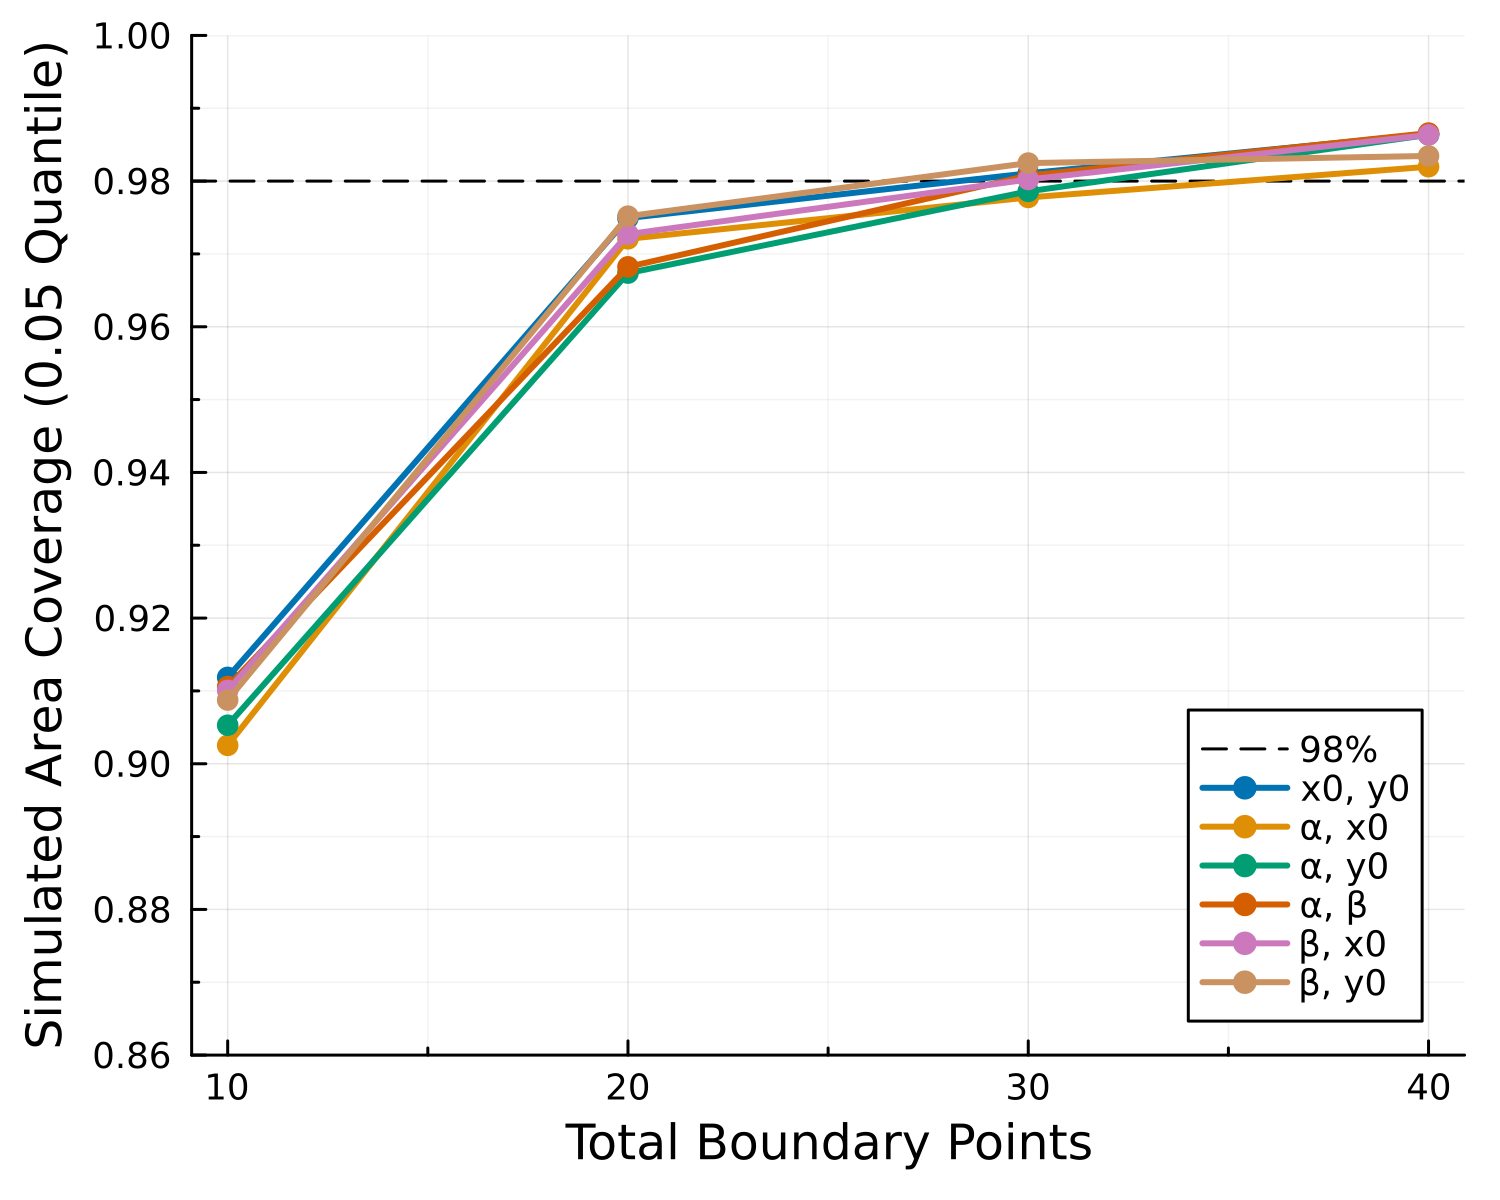

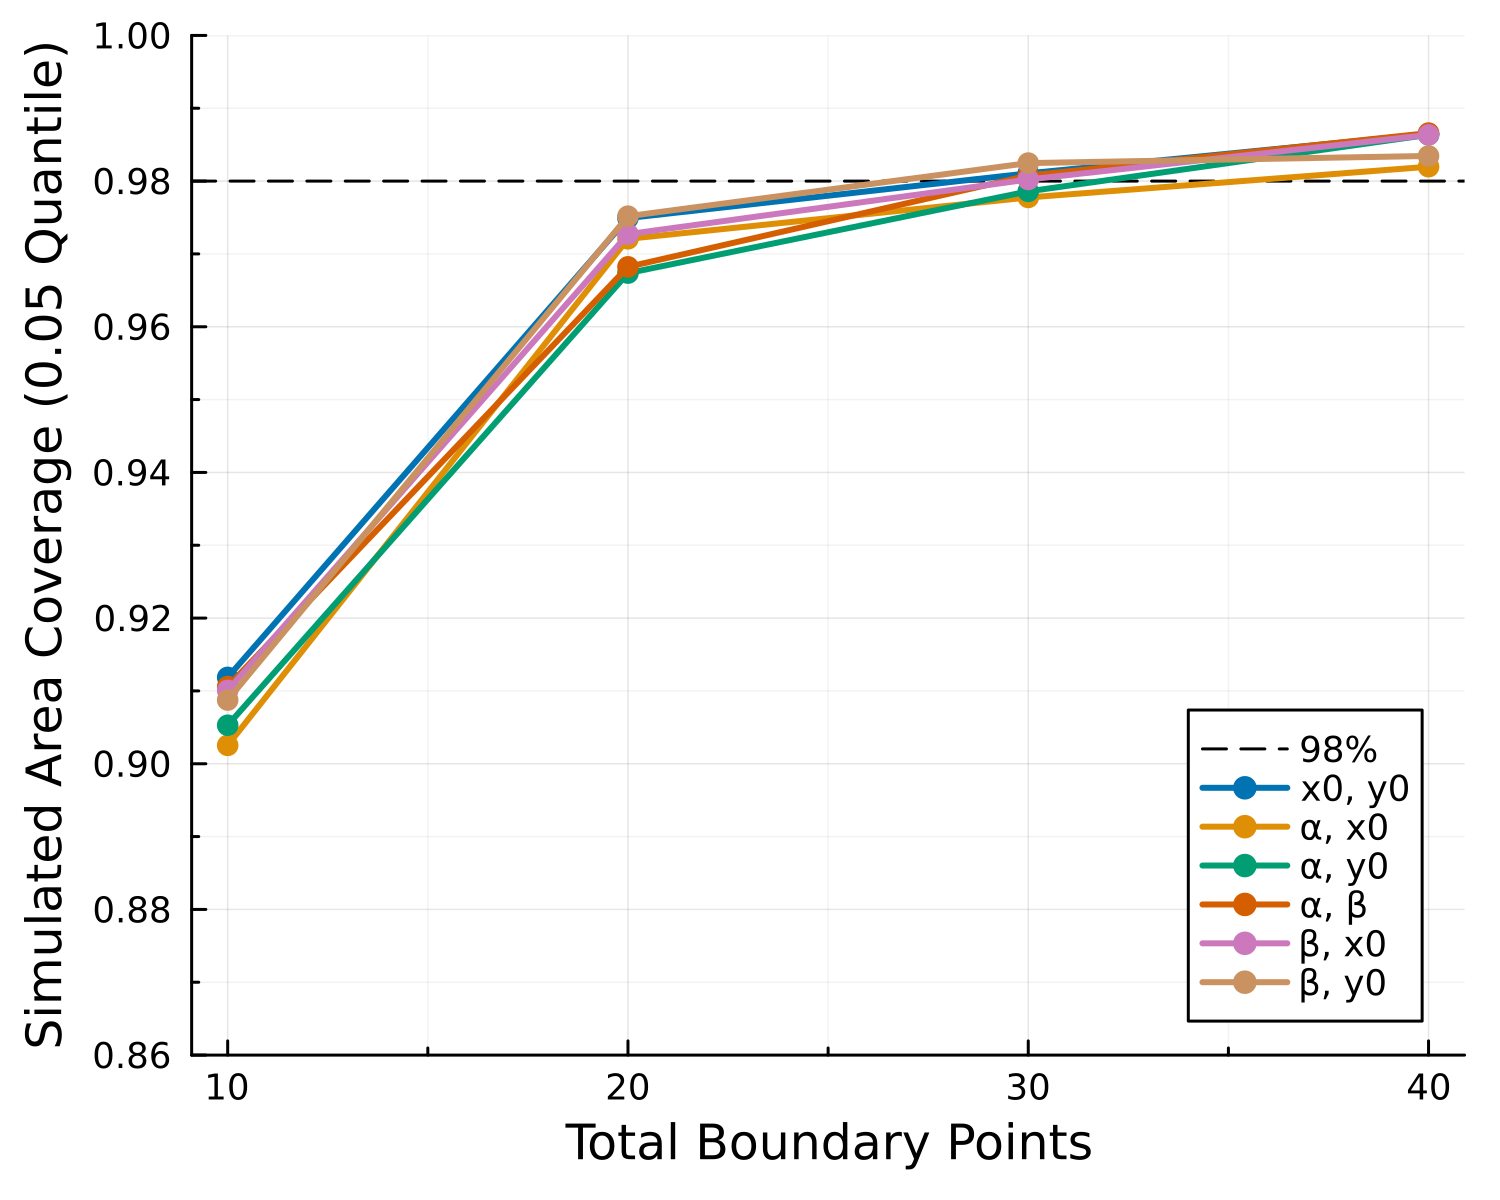

"c:\\Users\\joelt\\Documents\\GitHub\\JuLikelihood_MastersWorking\\Experiments\\Outputs\\lotka_volterra\\bivariate_area_coverage_ConvexHull.pdf"

In [50]:
using DataFrames, CSV
using Plots, StatsPlots;
gr();
using LaTeXStrings
using CategoricalArrays

format = (palette=:seaborn_colorblind, lw=2, size=(500, 400), dpi=300, title="", msw=0, mw=4, legend_position=:bottomright, xlabel="Total Boundary Points", minorgrid=true, minorticks=2, yticks=0.86:0.02:1.0, ylims=(0.86, 1.0));
locs = ["logistic", "lotka_volterra", "logistic_twospecies"];

loc = locs[2];
output_location = joinpath("Outputs", loc);
data_df = CSV.read(joinpath(output_location, "bivariate_boundary_coverage.csv"), DataFrame);

data_df[:, :hullmethod] .= [split(name, "(")[1] for name in data_df.hullmethod];

# θnames=["α", "β", "x0", "y0"]
# data_df.θnames2 = ["("*θnames[inds[1]] *", "*  θnames[inds[2]]*")" for inds in data_df.θindices)

data_df.θnames = [replace(strip(name, ['[', ']']), ':' => "") for name in data_df.θnames]
# data_df.θindices = categorical(data_df.θindices, levels=unique(data_df.θindices));


plots = []
for sub_df in groupby(data_df, [:hullmethod])
    plt = @df sub_df plot(:num_points, :coverage_lb; group=:θnames, marker=(:circle), ylabel="Simulated Area Coverage (0.05 Quantile)", format...)
    hline!(plt, [0.98], linestyle=:dash, label="98%", color=:black)
    plt.subplots[1].series_list = [plt.subplots[1].series_list[end]; plt.subplots[1].series_list[1:end-1]]
    push!(plots, plt)
end

display(plots[1])
display(plots[2])

savefig(plots[1], joinpath(output_location, "bivariate_area_coverage_MPP.pdf"))
savefig(plots[1], joinpath(output_location, "bivariate_area_coverage_ConvexHull.pdf"))


## Bivariate Confidence Profiles

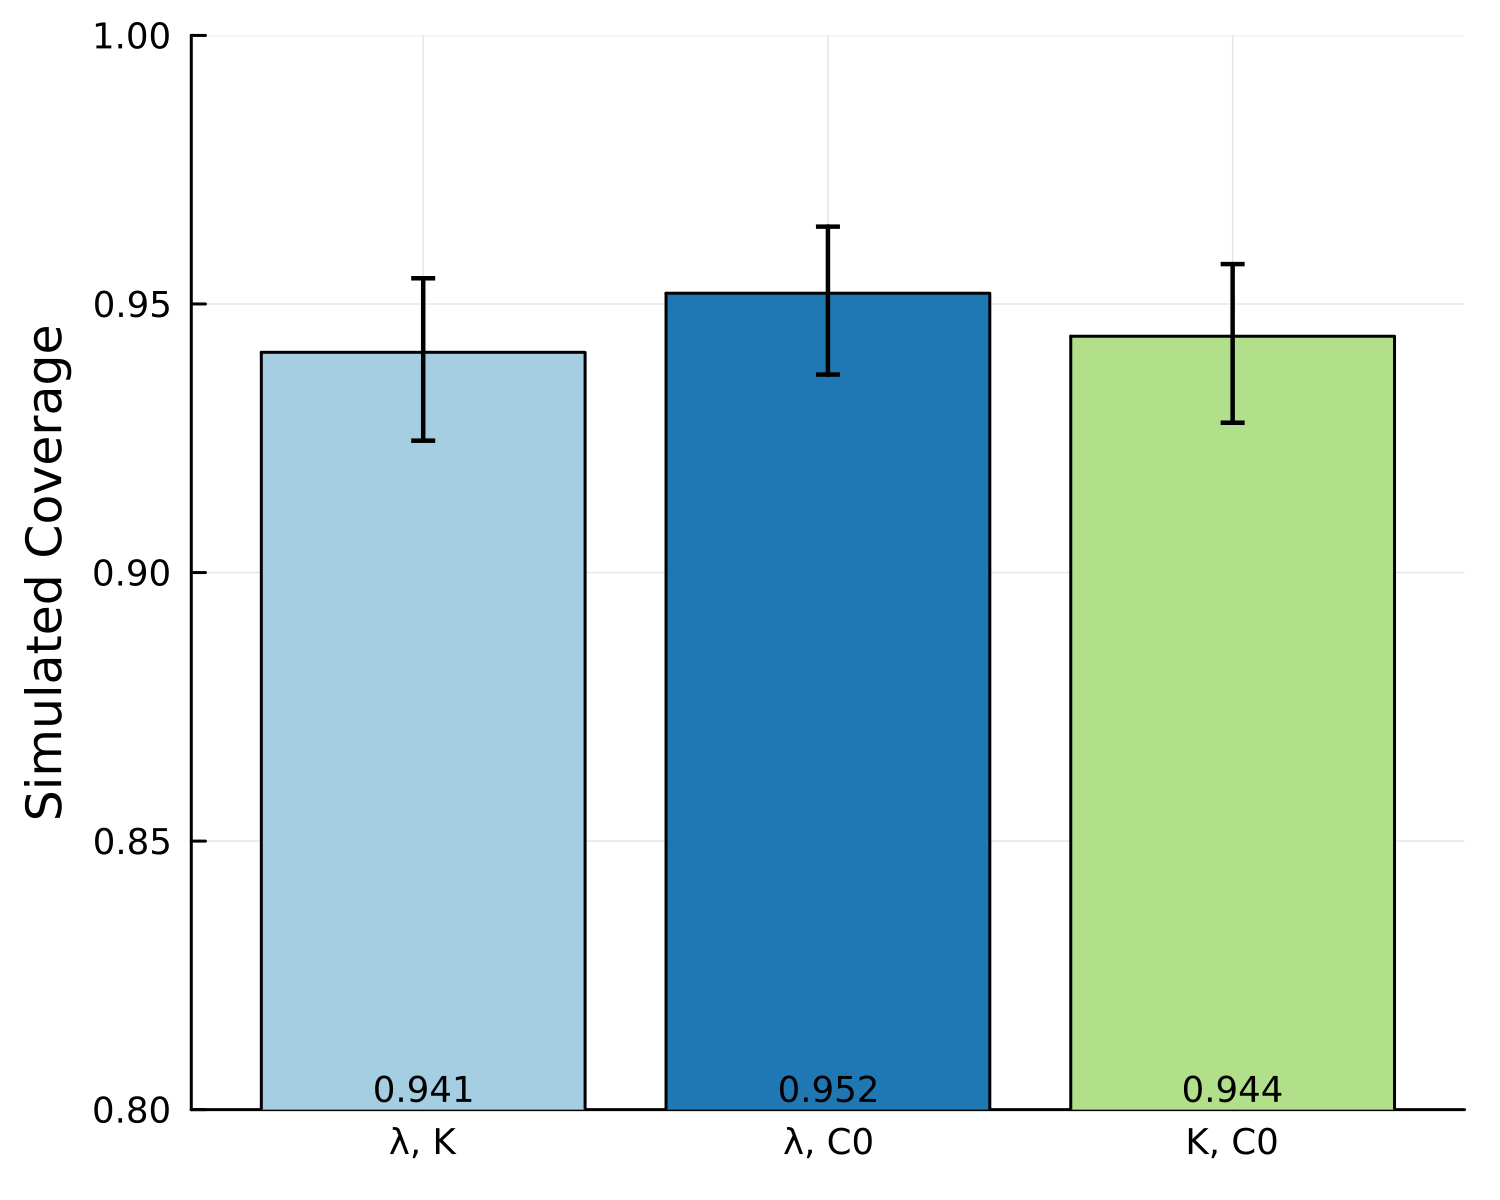

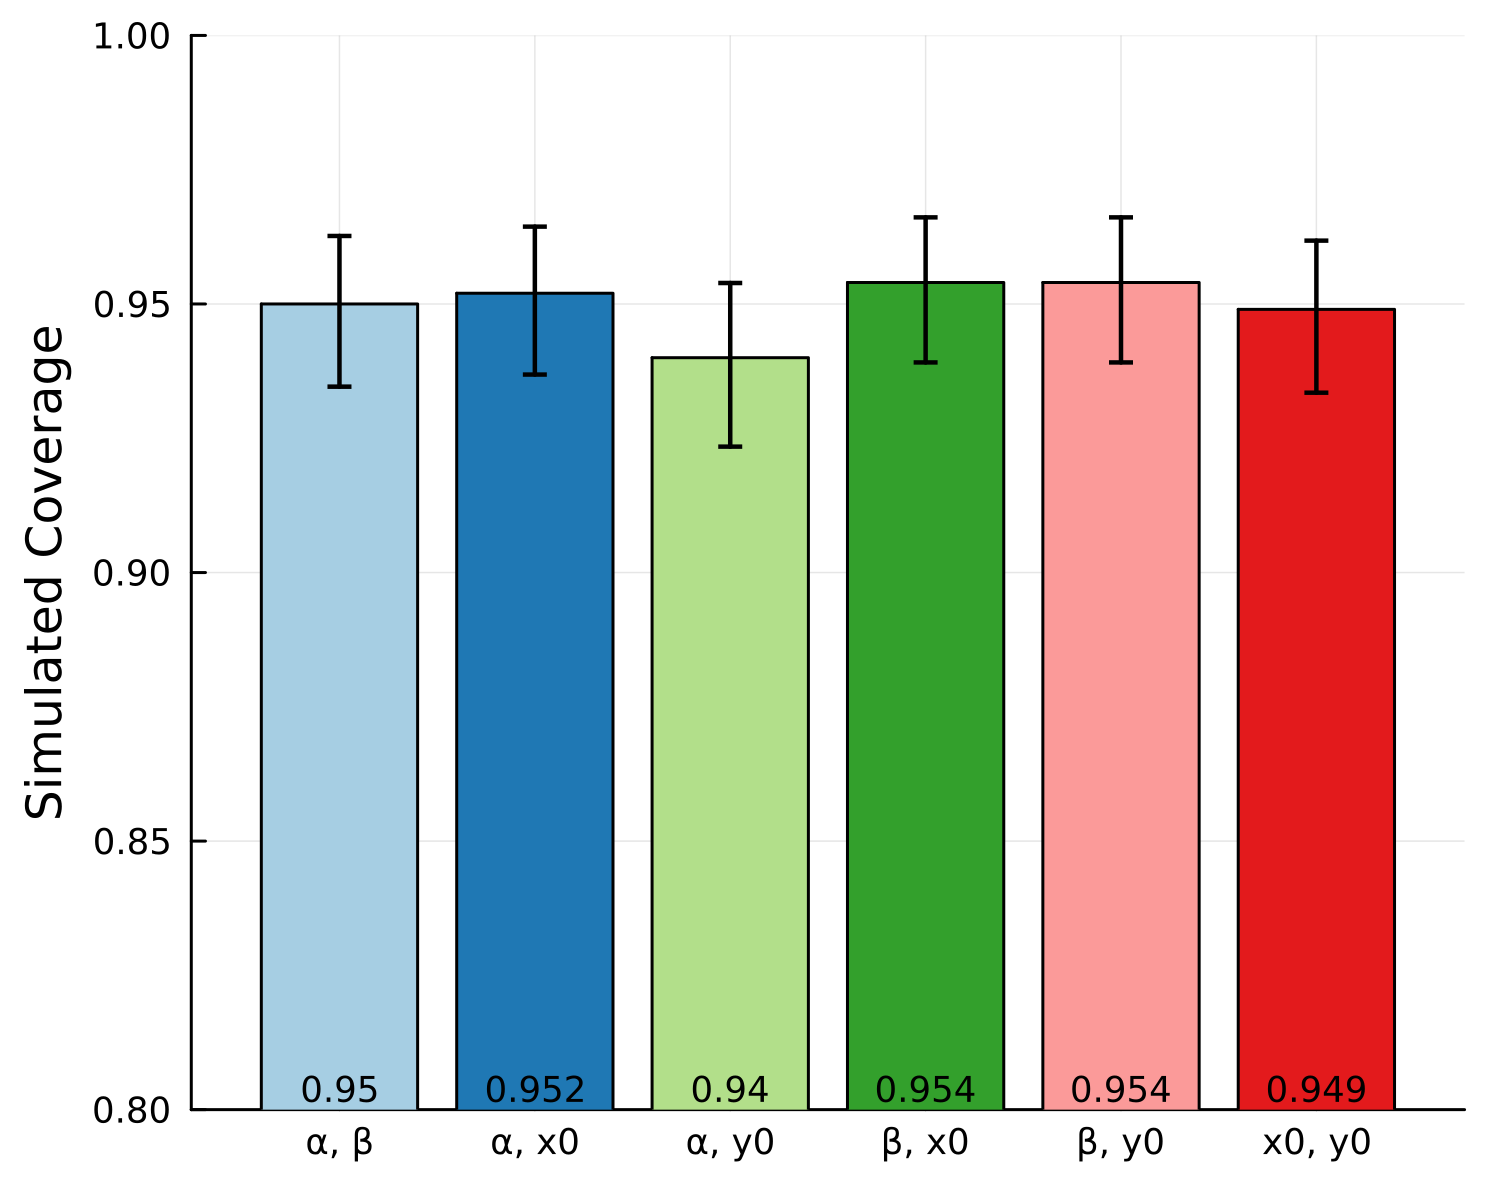

"c:\\Users\\joelt\\Documents\\GitHub\\JuLikelihood_MastersWorking\\Experiments\\Outputs\\lotka_volterra\\bivariate_parameter_coverage_lotka_volterra.pdf"

In [49]:
using DataFrames, CSV
using Plots, StatsPlots;
gr();
using LaTeXStrings
using CategoricalArrays

format = (msw=1.5, size=(500, 400), dpi=300, title="", legend_position=nothing, ylabel="Simulated Coverage");
locs = ["logistic", "lotka_volterra", "logistic_twospecies"]

loc = locs[1]
output_location = joinpath("Outputs", loc)
data_df = CSV.read(joinpath(output_location, "bivariate_parameter_coverage.csv"), DataFrame);
# data_df.θname = categorical(data_df.θname, levels=data_df.θname)
data_df.θnames = [replace(strip(name, ['[', ']']), ':' => "") for name in data_df.θnames]

plt = @df data_df plot(:θnames, :coverage; st=:bar, color=palette(:Paired)[1:nrow(data_df)], ylimits=(0.8, 1.0), yticks=LinRange(0.8, 1.0, 5),
    yerror=(data_df.coverage .- data_df.coverage_lb, data_df.coverage_ub .- data_df.coverage), format...);
annotate!(data_df.θnames, fill(0.8, nrow(data_df)), text.(data_df.coverage, fill(:bottom, nrow(data_df)), fill(:black, nrow(data_df)), fill(8, nrow(data_df))));

display(plt)
savefig(plt, joinpath(output_location, "bivariate_parameter_coverage_" * loc * ".pdf"))

loc = locs[2]
output_location = joinpath("Outputs", loc)
data_df = CSV.read(joinpath(output_location, "bivariate_parameter_coverage.csv"), DataFrame);
# data_df.θname = categorical(data_df.θname, levels=data_df.θname)

data_df.θnames = [replace(strip(name, ['[', ']']), ':'=>"") for name in data_df.θnames]

plt = @df data_df plot(:θnames, :coverage; st=:bar, palette=(:Paired), color=collect(1:nrow(data_df)), bar_position=:stack, ylimits=(0.8, 1.0), yticks=LinRange(0.8, 1.0, 5),
    yerror=(data_df.coverage .- data_df.coverage_lb, data_df.coverage_ub .- data_df.coverage), format...);
annotate!(data_df.θnames, fill(0.8, nrow(data_df)), text.(data_df.coverage, fill(:bottom, nrow(data_df)), fill(:black, nrow(data_df)), fill(8, nrow(data_df))))

display(plt)
savefig(plt, joinpath(output_location, "bivariate_parameter_coverage_" * loc * ".pdf"))

# loc = locs[3]
# output_location = joinpath("Outputs", loc)
# data_df = CSV.read(joinpath(output_location, "bivariate_parameter_coverage.csv"), DataFrame);
# # data_df.θname = categorical(data_df.θname, levels=data_df.θname)
# 
# plt = @df data_df plot(:θname, :coverage; st=:bar, color=palette(:Paired)[1:nrow(data_df)], bar_position=:stack, ylimits=(0.6, 1.0), yticks=LinRange(0.6,1.0,9),
#                         yerror=(data_df.coverage .- data_df.coverage_lb, data_df.coverage_ub .- data_df.coverage), format...);
# 
# annotate!(data_df.θname, fill(0.6,nrow(data_df)), text.(data_df.coverage, fill(:bottom,nrow(data_df)), fill(:black,nrow(data_df)), fill(8,nrow(data_df))))
# savefig(plt, joinpath(output_location, "parameter_coverage_"*loc*".pdf"))
# 
# output_location = joinpath("Outputs", loc)
# data_df = CSV.read(joinpath(output_location, "bivariate_parameter_coverage_more_data.csv"), DataFrame);
# # data_df.θname = categorical(data_df.θname, levels=data_df.θname)
# 
# plt = @df data_df plot(:θname, :coverage; st=:bar, color=palette(:Paired)[1:nrow(data_df)], bar_position=:stack, ylimits=(0.6, 1.0), yticks=LinRange(0.6,1.0,9),
#                         yerror=(data_df.coverage .- data_df.coverage_lb, data_df.coverage_ub .- data_df.coverage), format...);
# 
# annotate!(data_df.θname, fill(0.6,nrow(data_df)), text.(data_df.coverage, fill(:bottom,nrow(data_df)), fill(:black,nrow(data_df)), fill(8,nrow(data_df))))
# 
# display(data_df)
# savefig(plt, joinpath(output_location, "bivariate_parameter_coverage_"*loc*"_more_data.pdf"))

## Predictions of Model Solution (Data Distribution Mean)

### Logistic

#### Full Sampling

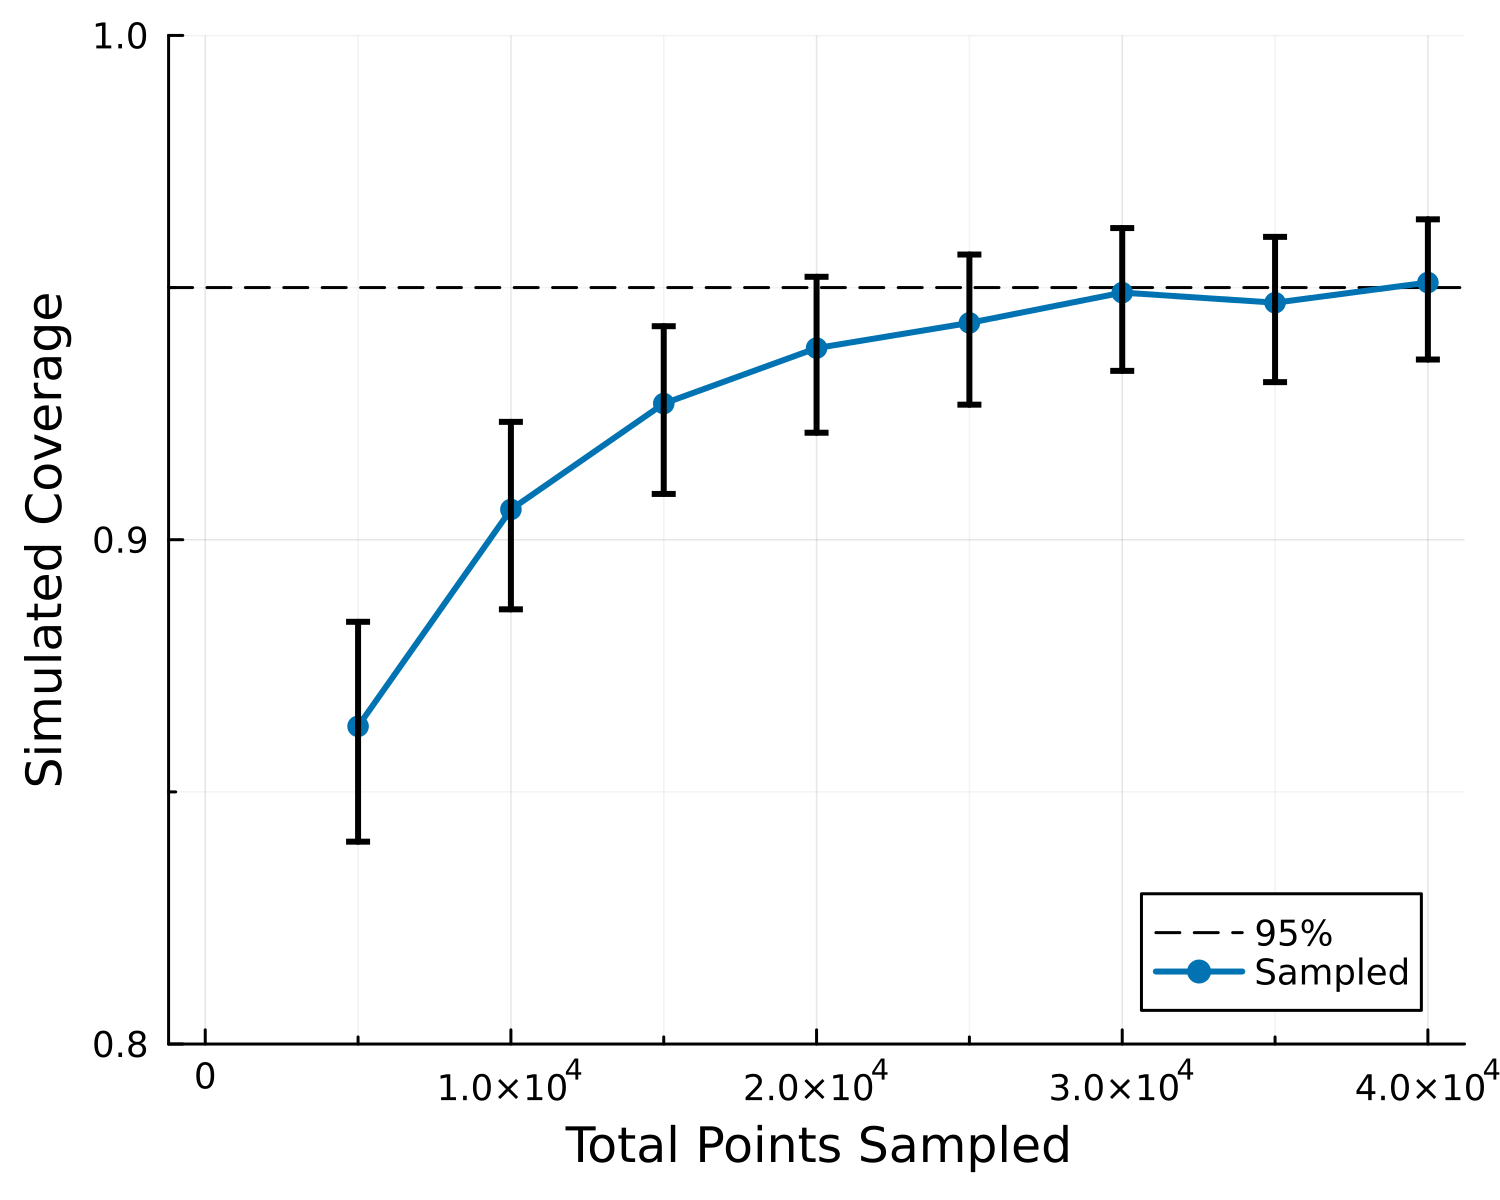

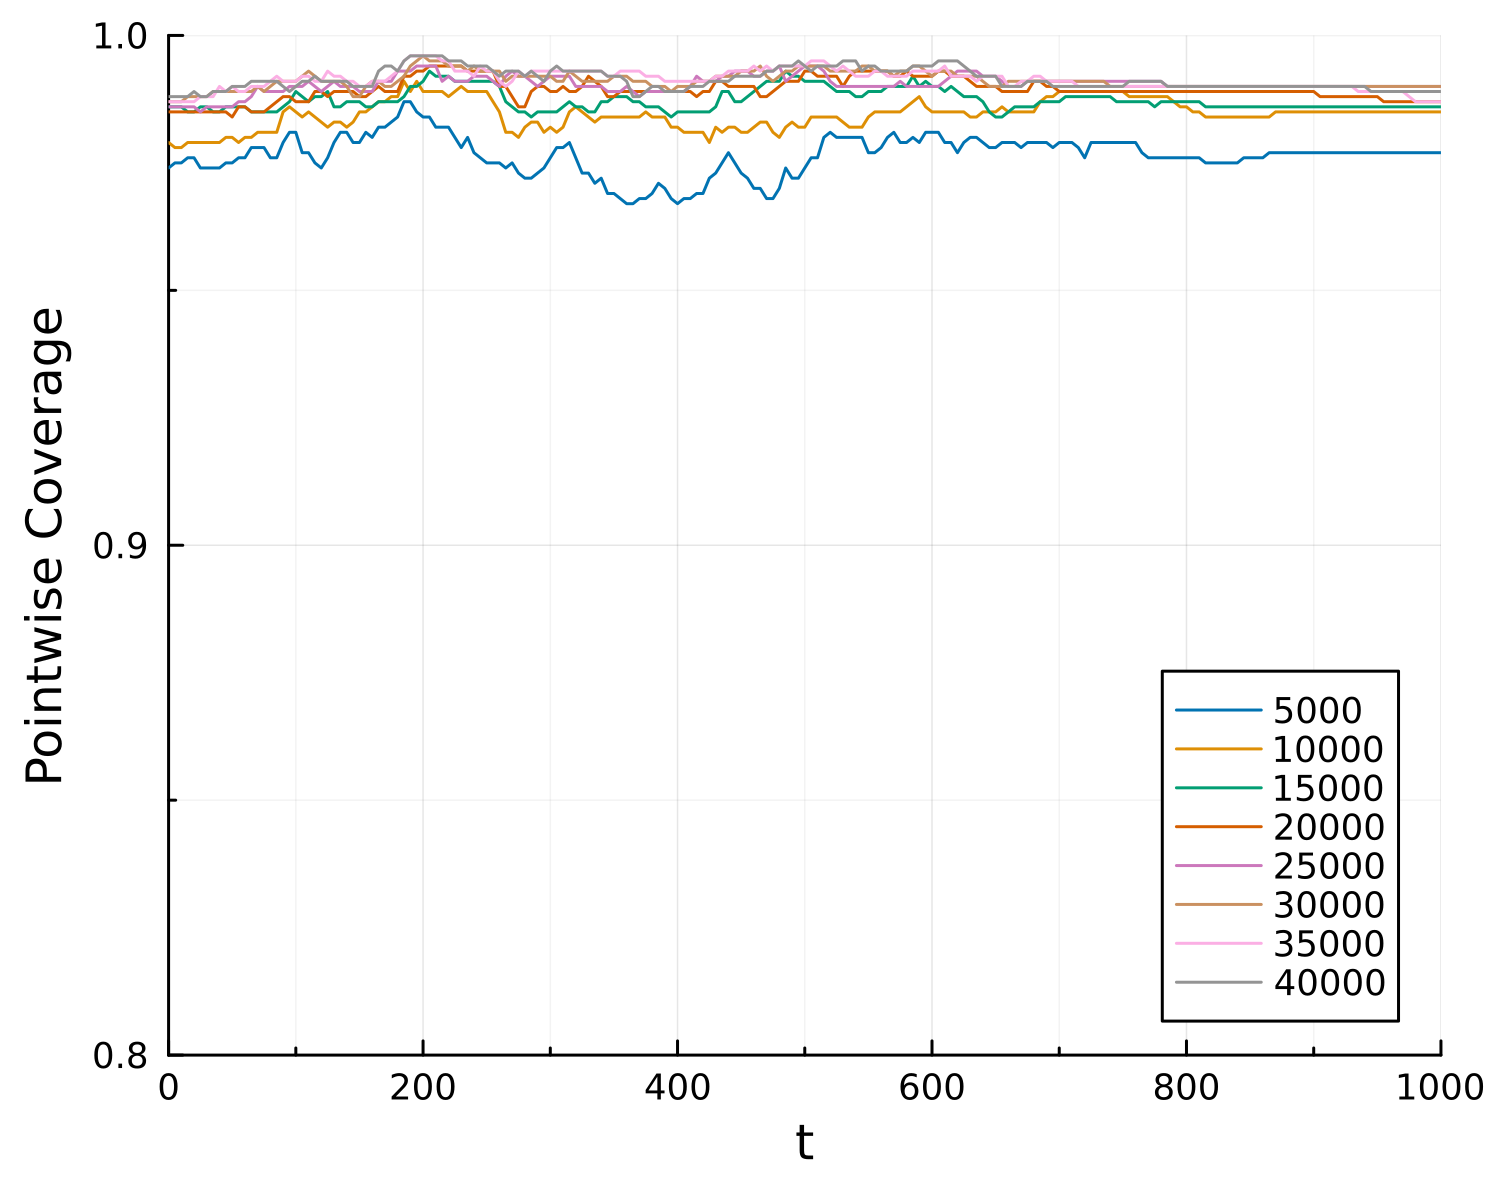

In [37]:
using DataFrames, Arrow
using Plots, StatsPlots;
using Plots.PlotMeasures
gr();
using LaTeXStrings
using CategoricalArrays

t_pred = 0:5:1000

format = (palette=:seaborn_colorblind, lw=2, size=(500, 400), dpi=300, title="", msw=0, mw=4, legend_position=:bottomright, xlabel="Total Points Sampled", minorgrid=true, minorticks=2, yticks=0.1:0.1:1.0, ylims=(0.8, 1.0));
locs = ["logistic", "lotka_volterra", "logistic_twospecies"];

loc = locs[1];
output_location = joinpath("Outputs", loc);
# data_df = CSV.read(joinpath(output_location, "full_sampling_prediction_coverage.csv"), DataFrame);
data_df = DataFrame(Arrow.Table(joinpath(output_location, "full_sampling_prediction_coverage.arrow")), copycols=true);

plt = plot()
hline!(plt, [0.95], linestyle=:dash, label="95%", color=:black)
@df data_df plot!(:num_points, :simultaneous_coverage; color=1, 
    yerror=(:simultaneous_coverage .- :coverage_lb, :coverage_ub .- :simultaneous_coverage), 
    marker=(:circle), label="Sampled", ylabel="Simulated Simultaneous Coverage", format...)
display(plt)

# data_good_cov = filter(:num_points => ==(30000), data_df)

data_df.num_points = string.(data_df.num_points)
plt = plot(; format...)
for df in groupby(data_df, :num_points)
    @df df plot!(t_pred, :pointwise_coverage; label=:num_points[1], xlabel="t", ylabel="Simulated Pointwise Coverage", xlims=(t_pred[1], t_pred[end]), rightmargin=3mm)
end
display(plt)

#### Univariate Profiles

Univariate confidence threshold

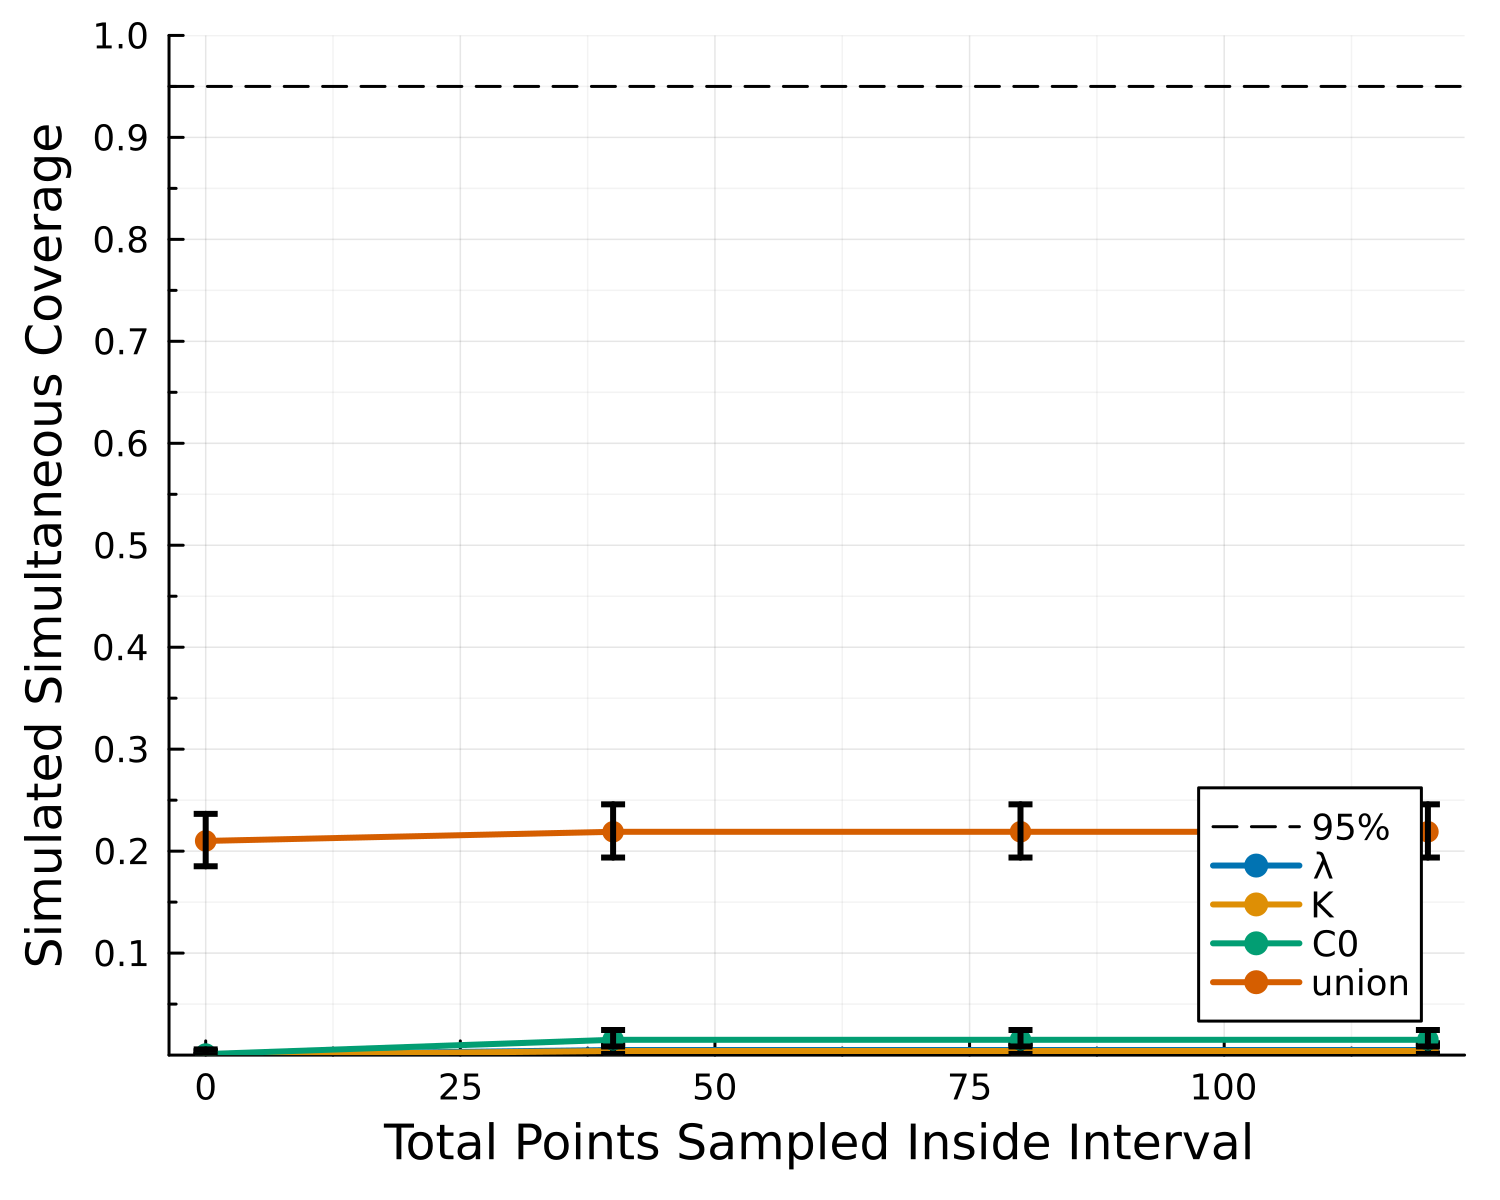

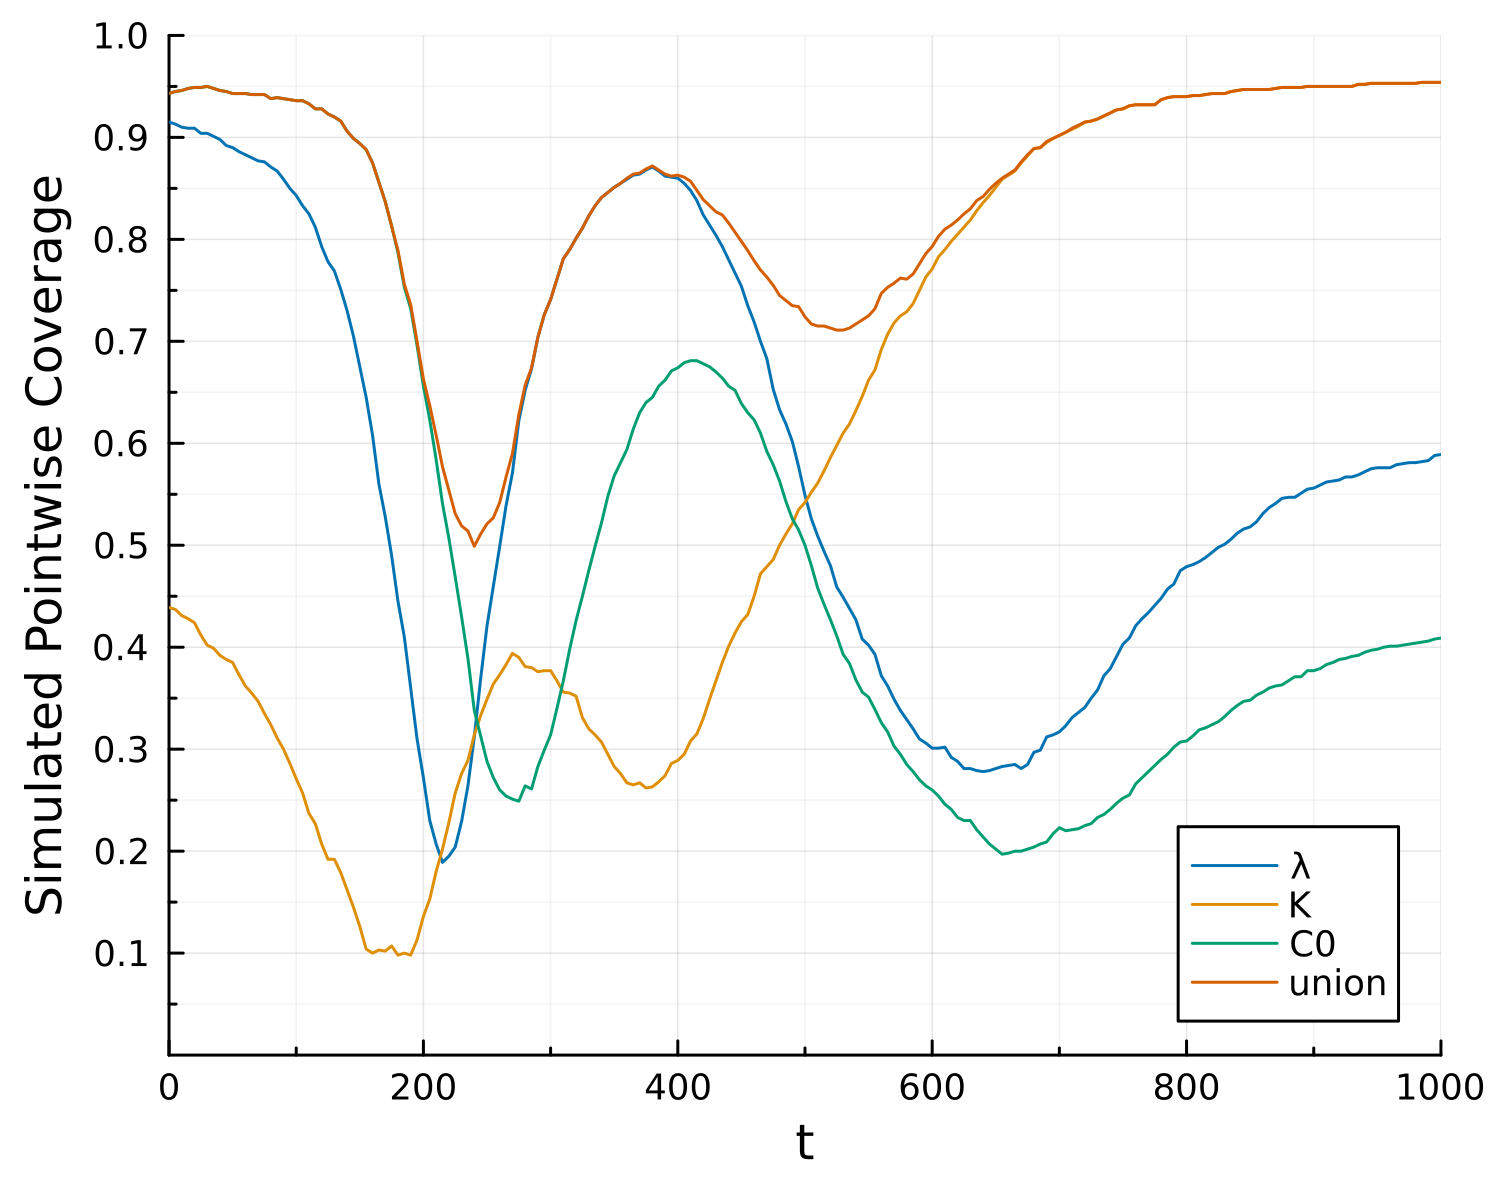

In [90]:
using DataFrames, Arrow
using Plots, StatsPlots;
using Plots.PlotMeasures
gr();
using LaTeXStrings
using CategoricalArrays

t_pred = 0:5:1000

format = (palette=:seaborn_colorblind, lw=2, size=(500, 400), dpi=300, title="", msw=0, mw=4, legend_position=:bottomright, xlabel="Total Points Sampled Inside Interval", minorgrid=true, minorticks=2, yticks=0.1:0.1:1.0, ylims=(0.0, 1.0));
locs = ["logistic", "lotka_volterra", "logistic_twospecies"];

loc = locs[1];
output_location = joinpath("Outputs", loc);
# data_df = CSV.read(joinpath(output_location, "full_sampling_prediction_coverage.csv"), DataFrame);
data_df = DataFrame(Arrow.Table(joinpath(output_location, "univariate_prediction_coverage.arrow")), copycols=true);

data_df.θname = categorical(copy(string.(data_df.θname)), levels=string.(unique(data_df.θname)))

plt = plot()
@df data_df plot!(:num_points, :simultaneous_coverage; group=:θname, 
    yerror=(:simultaneous_coverage .- :coverage_lb, :coverage_ub .- :simultaneous_coverage),
    marker=(:circle), ylabel="Simulated Simultaneous Coverage", format...)
hline!(plt, [0.95], linestyle=:dash, label="95%", color=:black)
plt.subplots[1].series_list = [plt.subplots[1].series_list[end]; plt.subplots[1].series_list[1:end-1]]
display(plt)


plt = plot(; format...)

data_lots_of_pnts = filter(:num_points => ==(120), data_df)
# display(data_lots_of_pnts)
for df in groupby(data_lots_of_pnts, :θname)
    @df df plot!(t_pred, :pointwise_coverage; label=:θname[1], xlabel="t",
            ylabel="Simulated Pointwise Coverage", xlims=(t_pred[1], t_pred[end]), rightmargin=3mm)
end
display(plt)

Simultaneous threshold

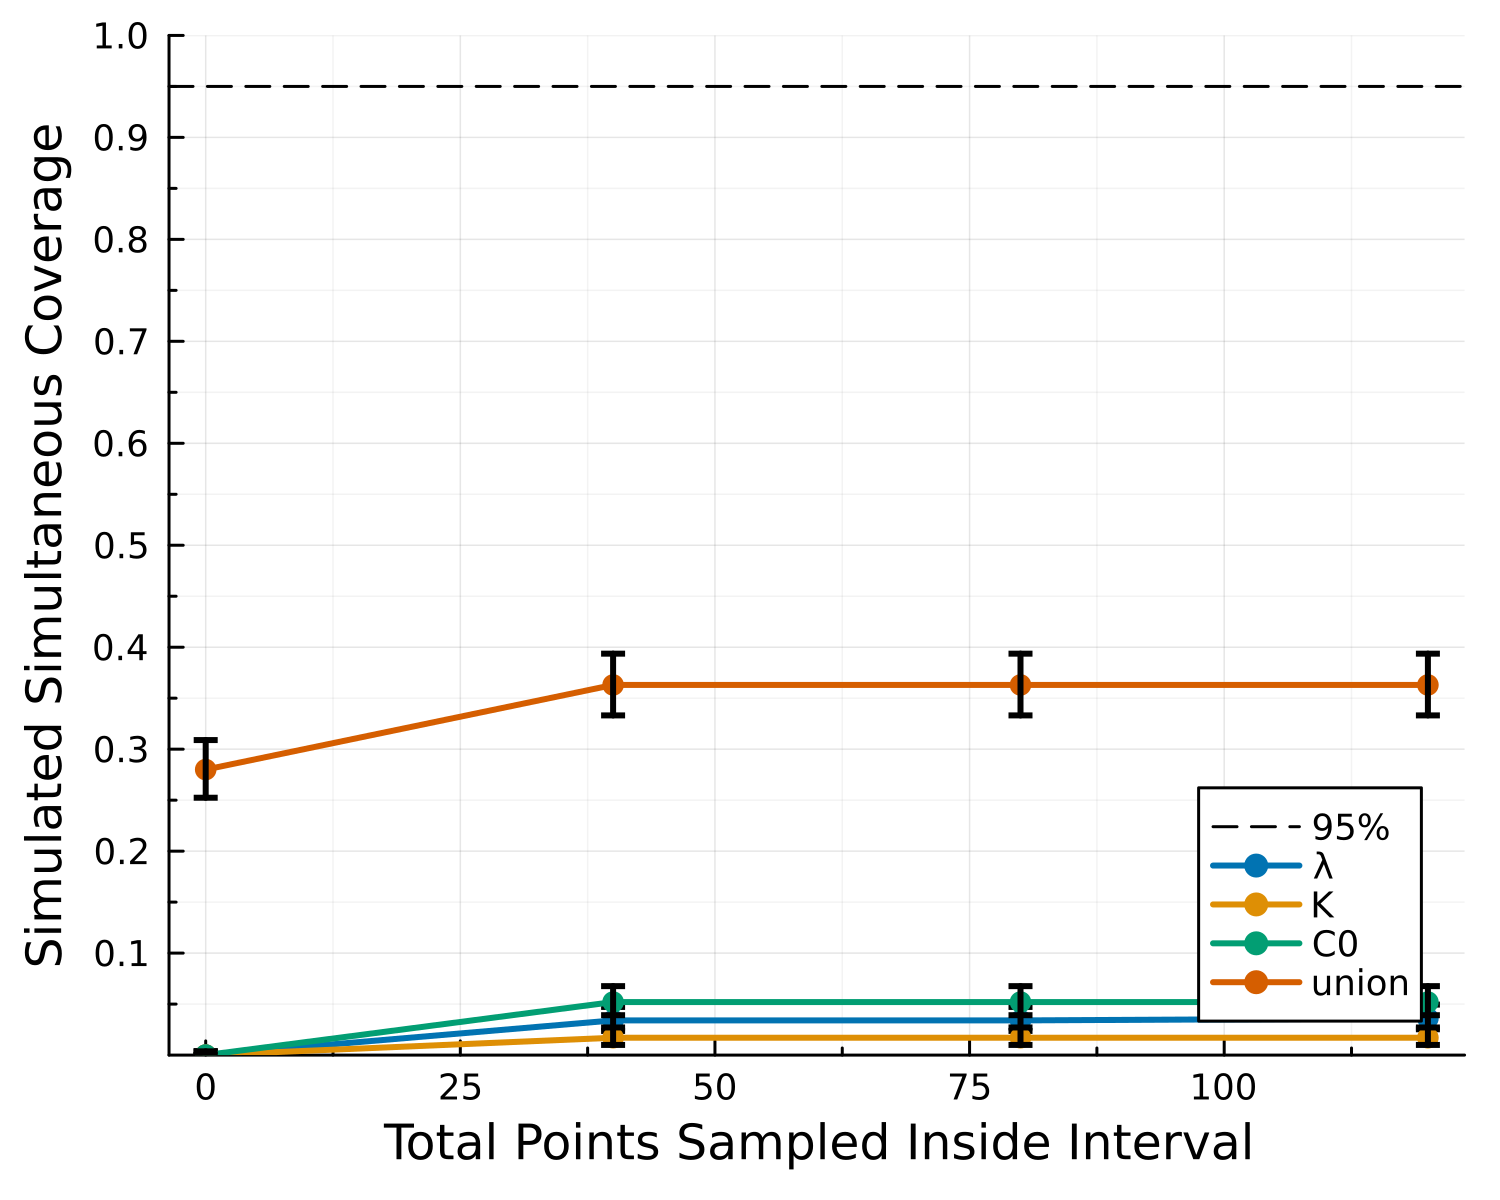

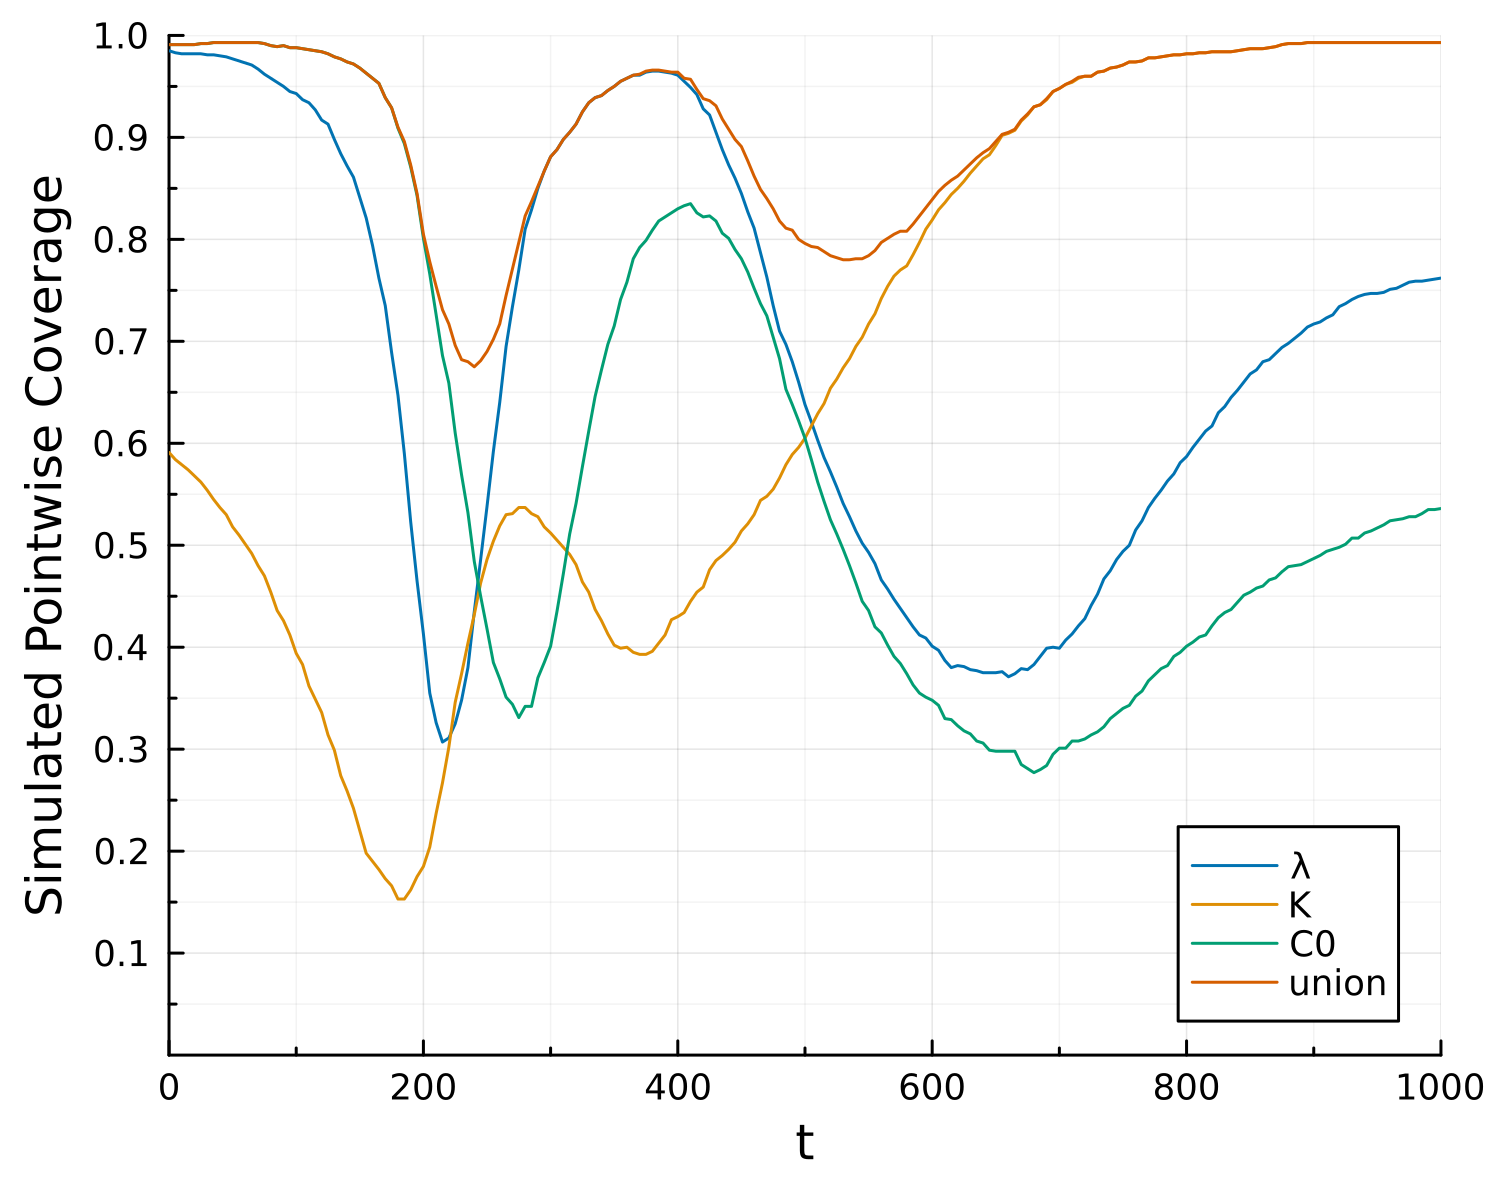

In [4]:
using DataFrames, Arrow
using Plots, StatsPlots;
using Plots.PlotMeasures
gr();
using LaTeXStrings
using CategoricalArrays

t_pred = 0:5:1000

format = (palette=:seaborn_colorblind, lw=2, size=(500, 400), dpi=300, title="", msw=0, mw=4, legend_position=:bottomright, xlabel="Total Points Sampled Inside Interval", minorgrid=true, minorticks=2, yticks=0.1:0.1:1.0, ylims=(0.0, 1.0));
locs = ["logistic", "lotka_volterra", "logistic_twospecies"];

loc = locs[1];
output_location = joinpath("Outputs", loc);
# data_df = CSV.read(joinpath(output_location, "full_sampling_prediction_coverage.csv"), DataFrame);
data_df = DataFrame(Arrow.Table(joinpath(output_location, "univariate_prediction_coverage_simultaneous_threshold.arrow")), copycols=true);

data_df.θname = categorical(copy(string.(data_df.θname)), levels=string.(unique(data_df.θname)))

plt = plot()
@df data_df plot!(:num_points, :simultaneous_coverage; group=:θname,
    yerror=(:simultaneous_coverage .- :coverage_lb, :coverage_ub .- :simultaneous_coverage),
    marker=(:circle), ylabel="Simulated Simultaneous Coverage", format...)
hline!(plt, [0.95], linestyle=:dash, label="95%", color=:black)
plt.subplots[1].series_list = [plt.subplots[1].series_list[end]; plt.subplots[1].series_list[1:end-1]]
display(plt)


plt = plot(; format...)

data_lots_of_pnts = filter(:num_points => ==(120), data_df)
# display(data_lots_of_pnts)
for df in groupby(data_lots_of_pnts, :θname)
    @df df plot!(t_pred, :pointwise_coverage; label=:θname[1], xlabel="t",
        ylabel="Simulated Pointwise Coverage", xlims=(t_pred[1], t_pred[end]), rightmargin=3mm)
end
display(plt)

#### Bivariate Profiles

Bivariate threshold

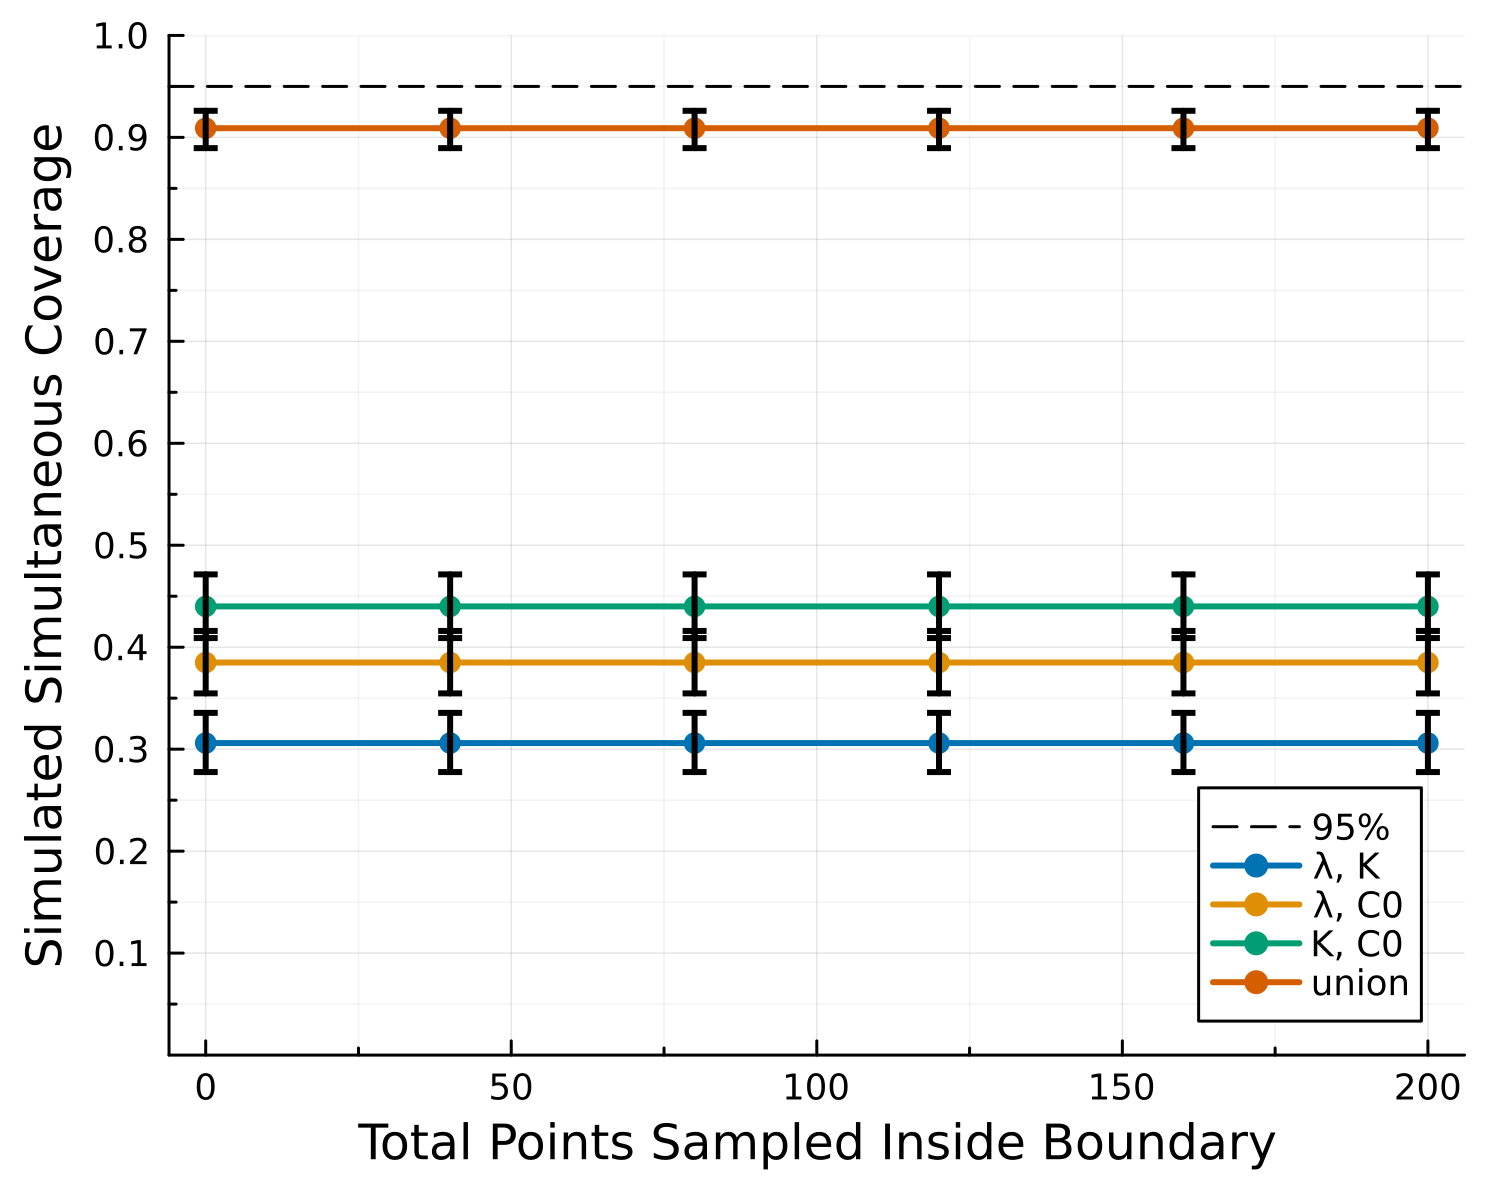

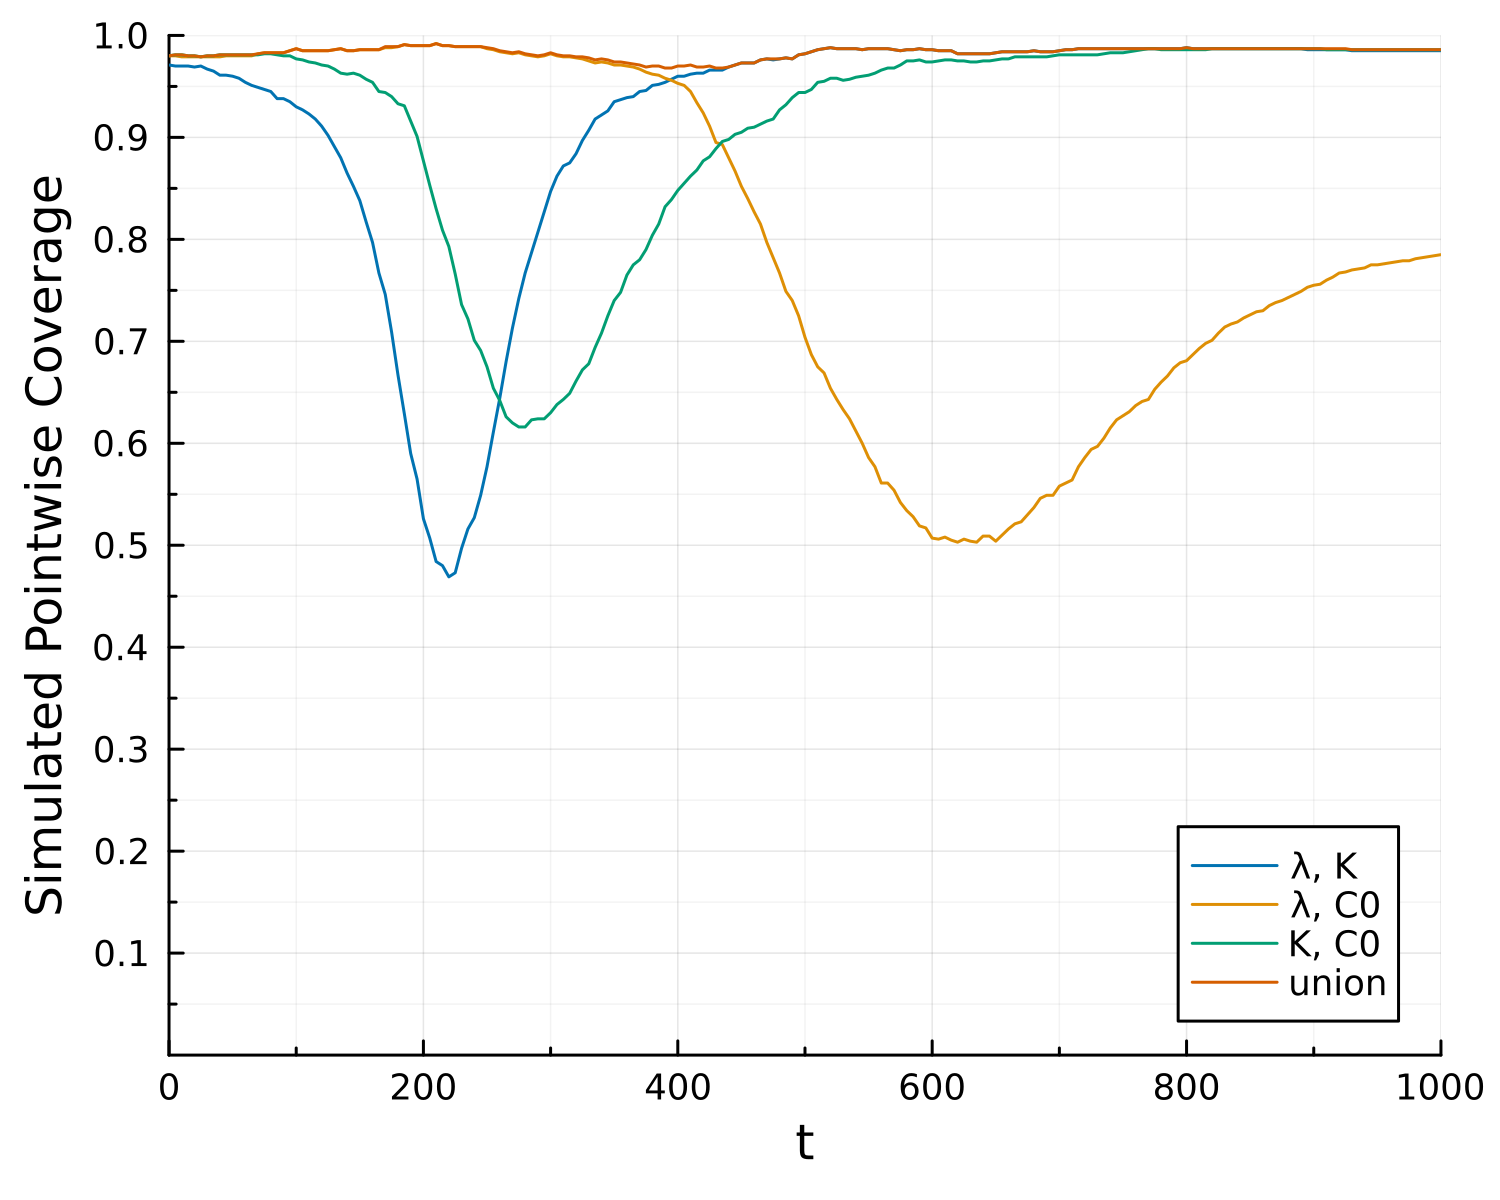

In [3]:
using DataFrames, Arrow
using Plots, StatsPlots;
using Plots.PlotMeasures
gr();
using LaTeXStrings
using CategoricalArrays

t_pred = 0:5:1000

format = (palette=:seaborn_colorblind, lw=2, size=(500, 400), dpi=300, title="", msw=0, mw=4, legend_position=:bottomright, xlabel="Total Points Sampled Inside Boundary", minorgrid=true, minorticks=2, yticks=0.1:0.1:1.0, ylims=(0.0, 1.0));
locs = ["logistic", "lotka_volterra", "logistic_twospecies"];

loc = locs[1];
output_location = joinpath("Outputs", loc);
# data_df = CSV.read(joinpath(output_location, "full_sampling_prediction_coverage.csv"), DataFrame);
data_df = DataFrame(Arrow.Table(joinpath(output_location, "bivariate_prediction_coverage.arrow")), copycols=true);

data_df.θname = [replace(strip(string(name), ['[', ']']), ':' => "") for name in data_df.θname]
data_df.θname = categorical(copy(data_df.θname), levels=unique(data_df.θname))

plt = plot()
@df data_df plot!(:num_points, :simultaneous_coverage; group=:θname,
    yerror=(:simultaneous_coverage .- :coverage_lb, :coverage_ub .- :simultaneous_coverage),
    marker=(:circle), ylabel="Simulated Simultaneous Coverage", format...)
hline!(plt, [0.95], linestyle=:dash, label="95%", color=:black)
plt.subplots[1].series_list = [plt.subplots[1].series_list[end]; plt.subplots[1].series_list[1:end-1]]
display(plt)


plt = plot(; format...)

data_lots_of_pnts = filter(:num_points => ==(0), data_df)
# display(data_lots_of_pnts)
for df in groupby(data_lots_of_pnts, :θname)
    @df df plot!(t_pred, :pointwise_coverage; label=:θname[1], xlabel="t",
        ylabel="Simulated Pointwise Coverage", xlims=(t_pred[1], t_pred[end]), rightmargin=3mm)
end
display(plt)

Simultaneous threshold

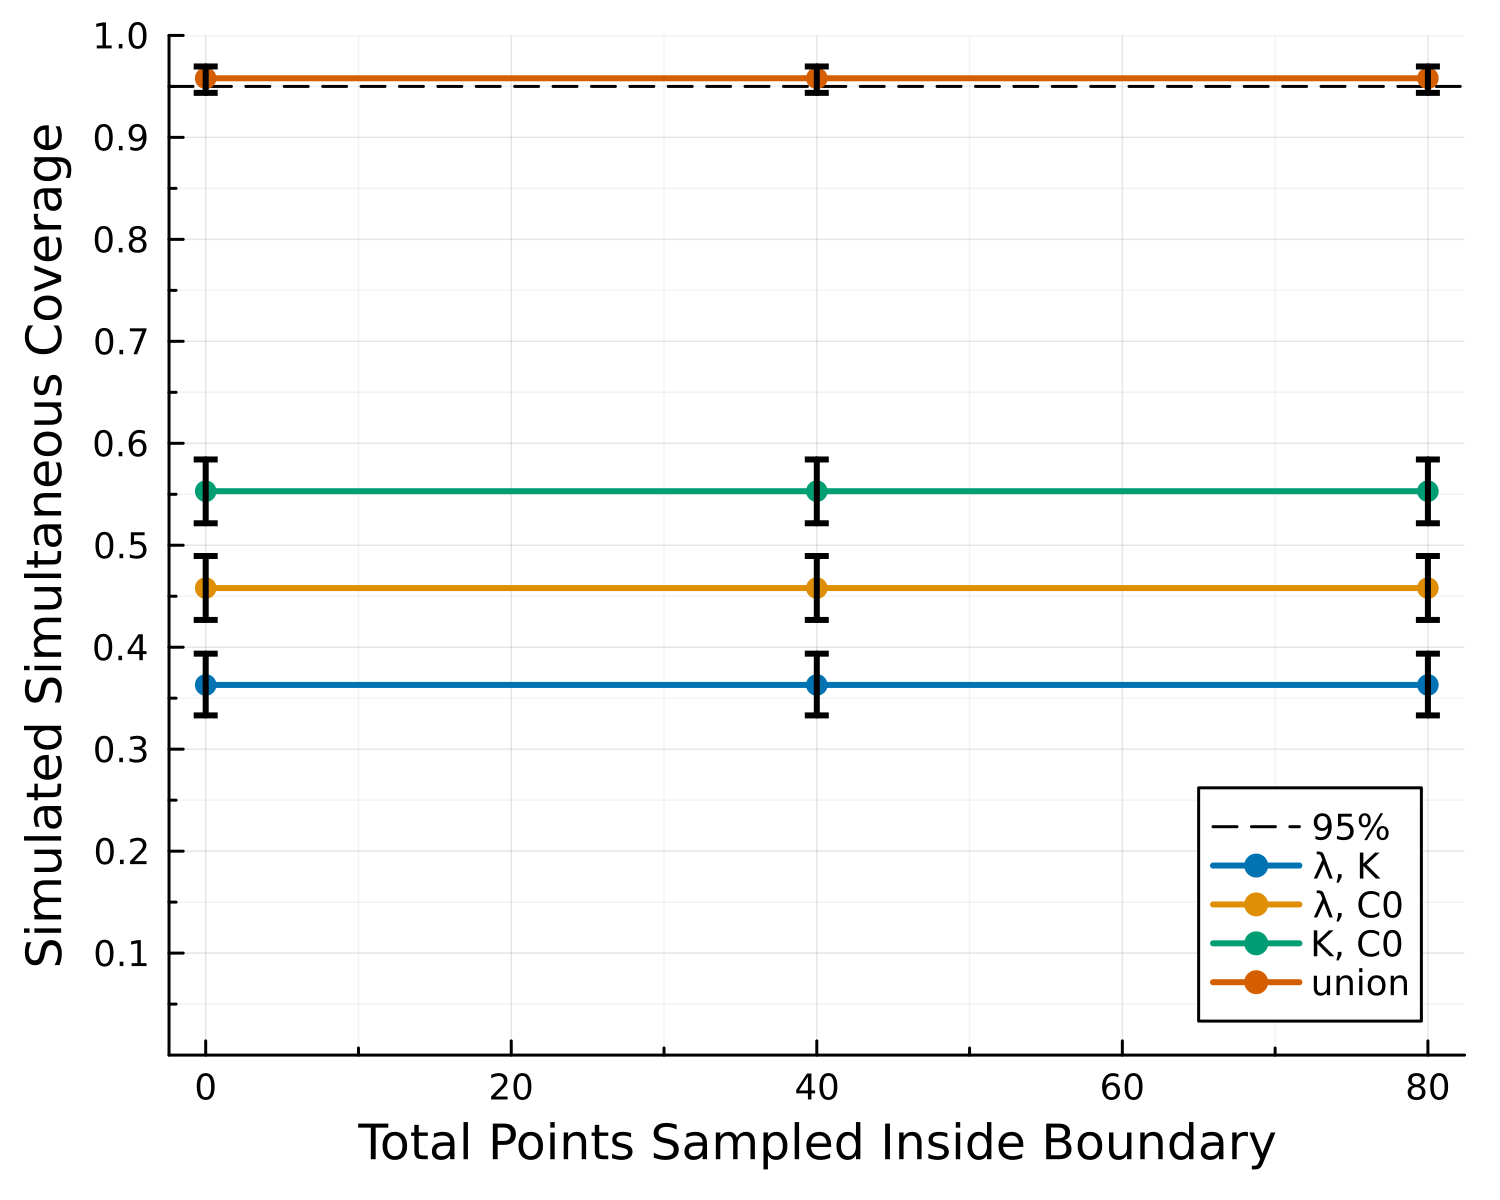

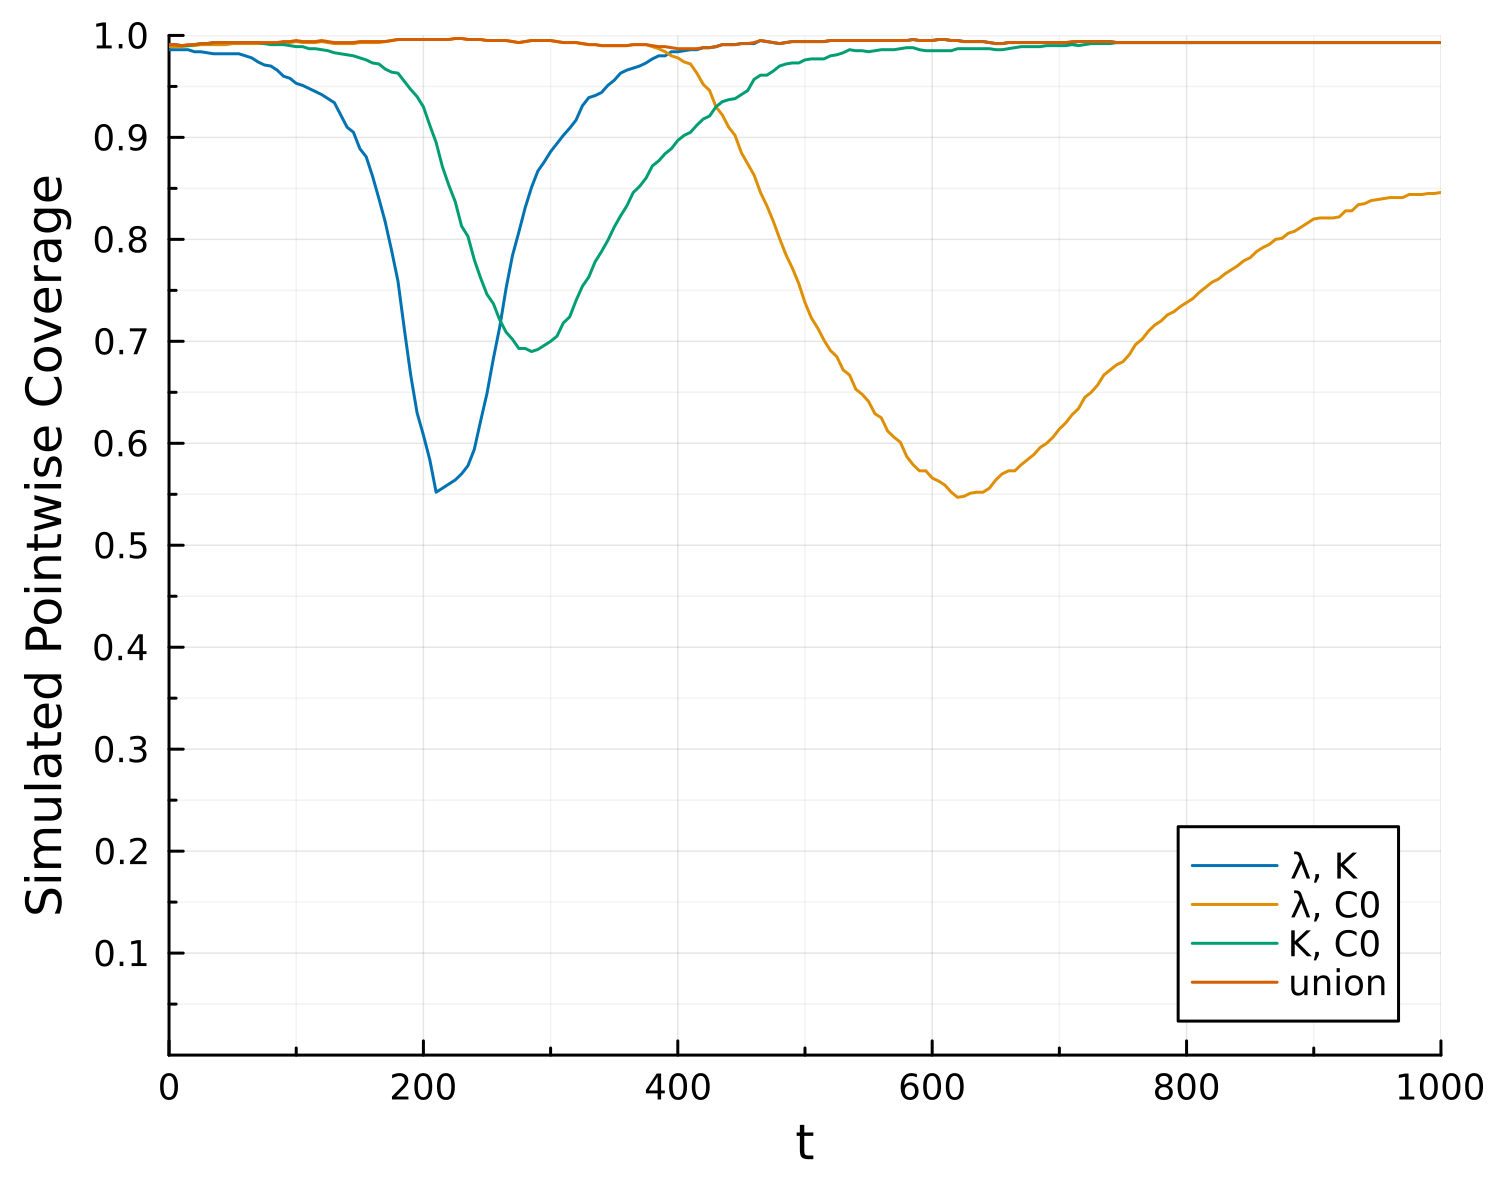

In [5]:
using DataFrames, Arrow
using Plots, StatsPlots;
using Plots.PlotMeasures
gr();
using LaTeXStrings
using CategoricalArrays

t_pred = 0:5:1000

format = (palette=:seaborn_colorblind, lw=2, size=(500, 400), dpi=300, title="", msw=0, mw=4, legend_position=:bottomright, xlabel="Total Points Sampled Inside Boundary", minorgrid=true, minorticks=2, yticks=0.1:0.1:1.0, ylims=(0.0, 1.0));
locs = ["logistic", "lotka_volterra", "logistic_twospecies"];

loc = locs[1];
output_location = joinpath("Outputs", loc);
# data_df = CSV.read(joinpath(output_location, "full_sampling_prediction_coverage.csv"), DataFrame);
data_df = DataFrame(Arrow.Table(joinpath(output_location, "bivariate_prediction_coverage_simultaneous_threshold.arrow")), copycols=true);

data_df.θname = [replace(strip(string(name), ['[', ']']), ':' => "") for name in data_df.θname]
data_df.θname = categorical(copy(data_df.θname), levels=unique(data_df.θname))

plt = plot()
@df data_df plot!(:num_points, :simultaneous_coverage; group=:θname,
    yerror=(:simultaneous_coverage .- :coverage_lb, :coverage_ub .- :simultaneous_coverage),
    marker=(:circle), ylabel="Simulated Simultaneous Coverage", format...)
hline!(plt, [0.95], linestyle=:dash, label="95%", color=:black)
plt.subplots[1].series_list = [plt.subplots[1].series_list[end]; plt.subplots[1].series_list[1:end-1]]
display(plt)


plt = plot(; format...)

data_lots_of_pnts = filter(:num_points => ==(0), data_df)
# display(data_lots_of_pnts)
for df in groupby(data_lots_of_pnts, :θname)
    @df df plot!(t_pred, :pointwise_coverage; label=:θname[1], xlabel="t",
        ylabel="Simulated Pointwise Coverage", xlims=(t_pred[1], t_pred[end]), rightmargin=3mm)
end
display(plt)